In [1354]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from scipy.stats import norm, stats
import statsmodels.api as sm
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#import plotty
import warnings
warnings.filterwarnings('ignore')

In [1355]:
#Read Csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [1356]:
df.describe() #check the missing value, mean, std, quartile and iqr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [1357]:
df.info() # check the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1358]:
#shape of the dataset
df.shape

(1599, 12)

In [1359]:
#check the duplicate values
df.duplicated().sum()

240

In [1360]:
#removing duplicates value
df=df.drop_duplicates()

In [1361]:
#Actual dataset after removing
df.shape

(1359, 12)

In [1362]:
#check the null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1363]:
# analyize the correlation
corr = df.corr()
corr.shape

(12, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

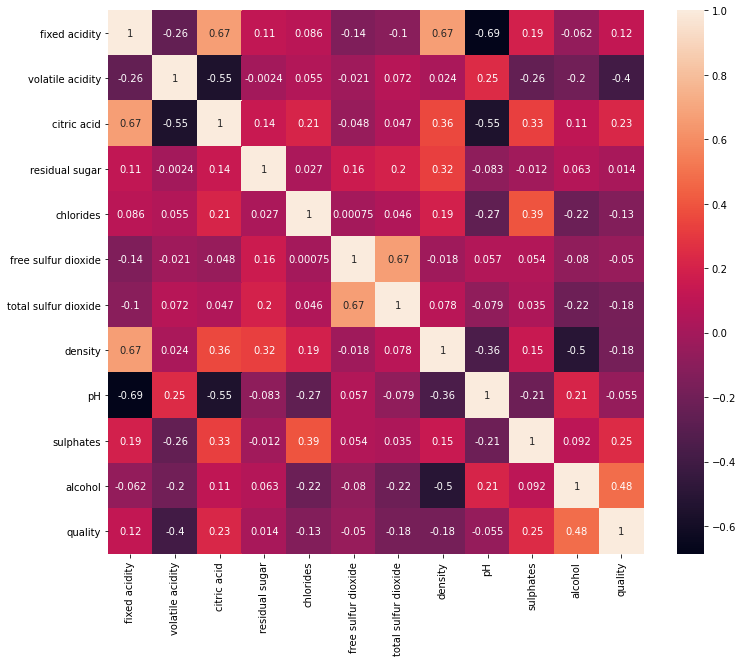

In [1364]:
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

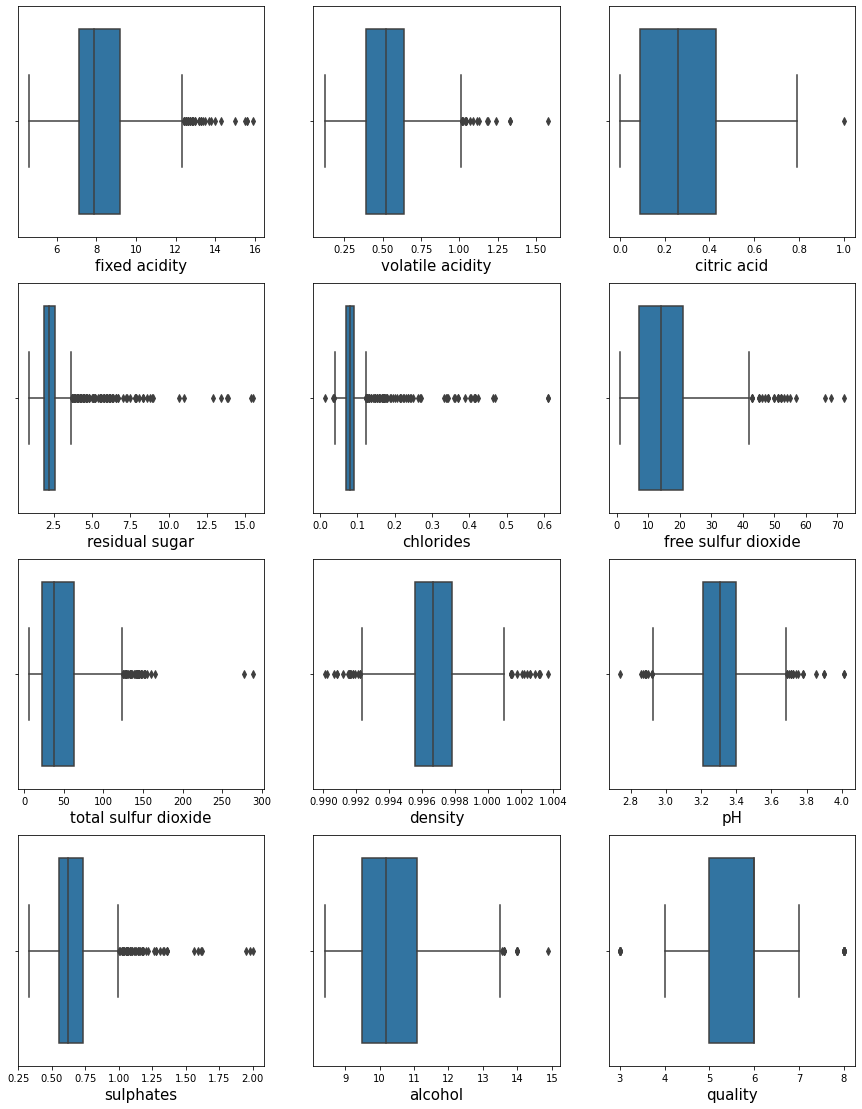

In [1365]:
#visaulize the columns by using boxplot
plt.figure(figsize =(15,50))
graph=1
for column in df:
    if graph<30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()  

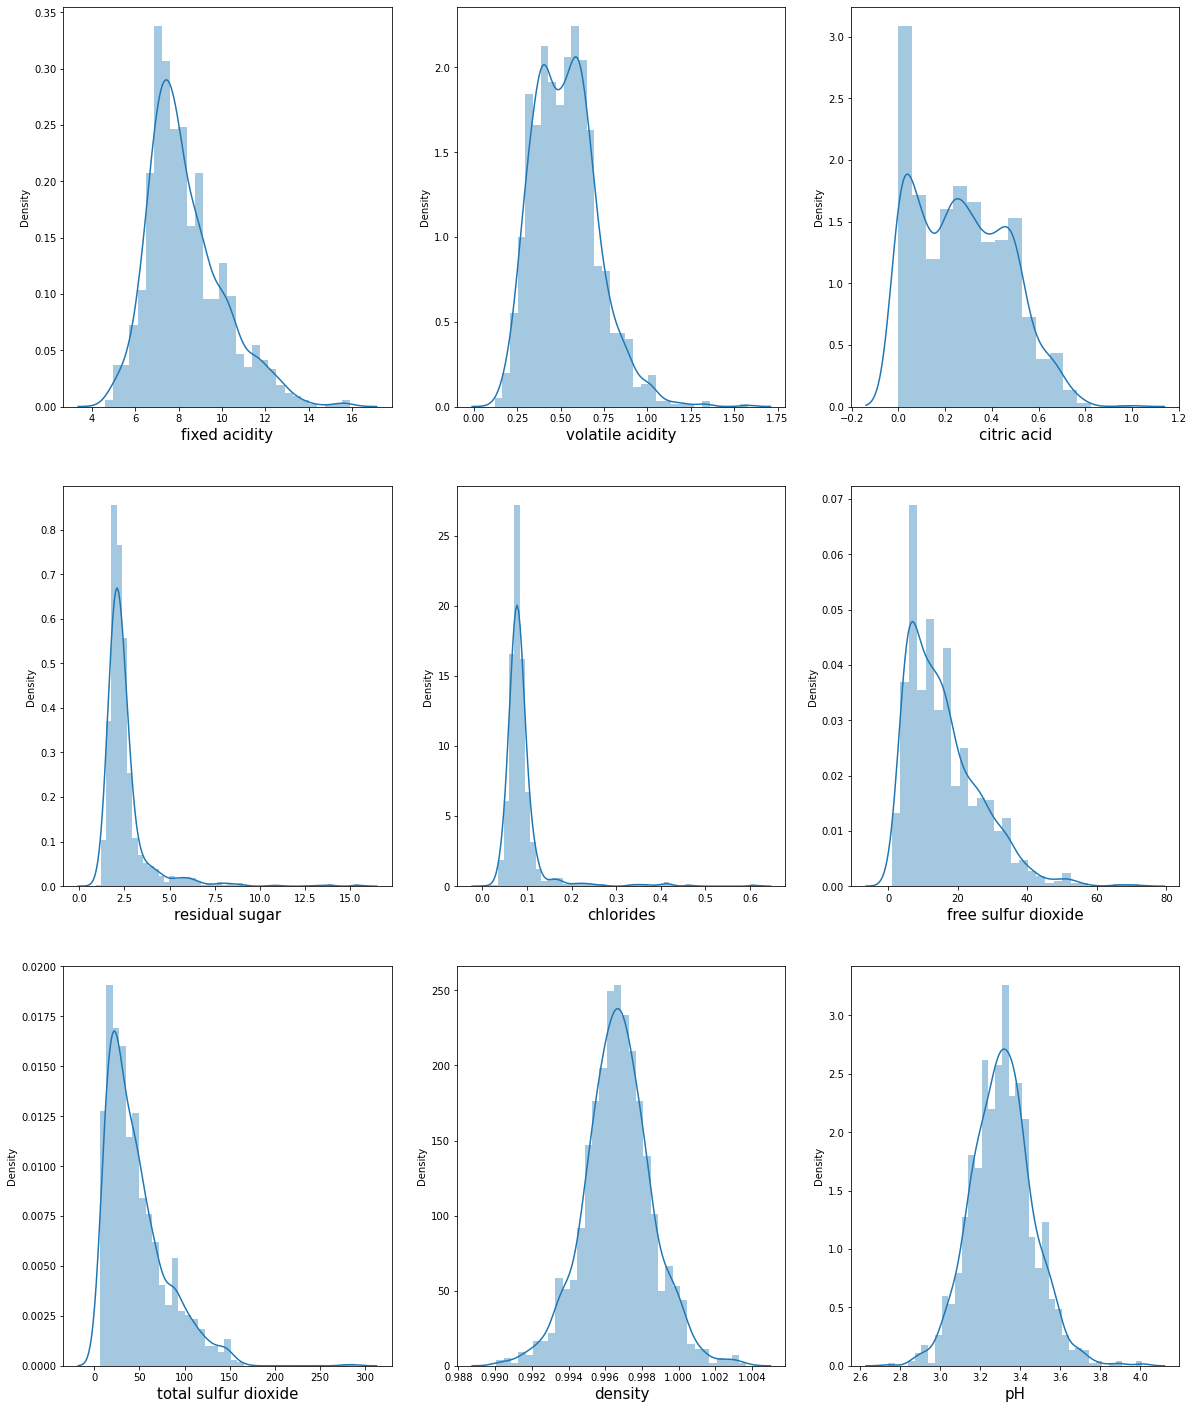

In [1366]:
#visaulize the normal distribution of the column by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()    

Column1: 'Fixed acidity'

In [1367]:
#check the unique values in column
df['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [1368]:
df['fixed acidity'].describe() #check the missing value, mean, std, quartile and iqr

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [1369]:
#check the zero value in column
df['fixed acidity'].all()

True

In [1370]:
#count the value of each datapoint
df['fixed acidity'].value_counts()

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
4.6      1
13.5     1
4.9      1
15.9     1
15.0     1
Name: fixed acidity, Length: 96, dtype: int64

correlation between the Features and with label:-----> (12, 12)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

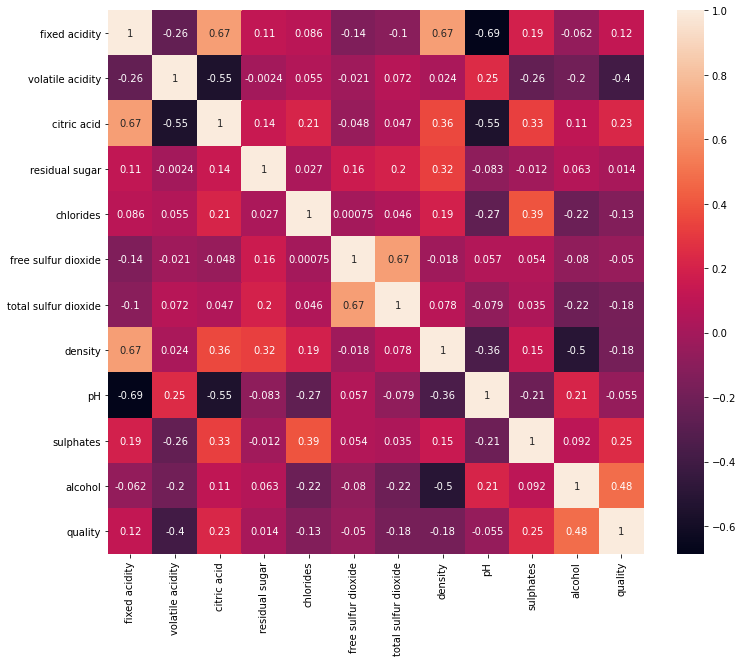

In [1371]:
# Check the correlation between 'fixed acidity' & 'label - Quality'
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show 
#The correlation between Feature:- 'Fixed acidity' and Label:- 'quality' is 0.12

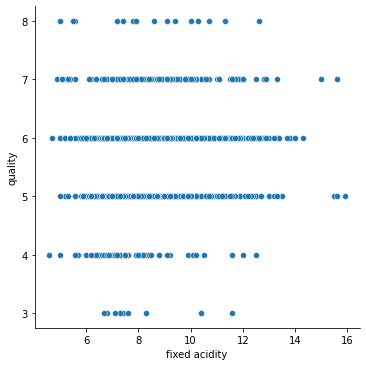

In [1372]:
# Visualize the outliers by using relational plot 
sns.relplot(data= df, x = 'fixed acidity', y='quality')

In [1373]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['fixed acidity'].mean())
print('Median of the column:----->',df['fixed acidity'].median())
print('Mode of the column:----->',st.mode(df['fixed acidity']))
print('std of the column:----->',df['fixed acidity'].std())
#mean,median,mode values are not good right now because of some outliers

Mean of the column:-----> 8.310596026490087
Median of the column:-----> 7.9
Mode of the column:-----> 7.2
std of the column:-----> 1.736989807532466


Text(0.5, 0, 'fixed acidity')

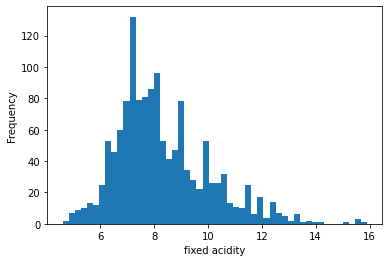

In [1374]:
# visualize the outliers by plotting histogram
df['fixed acidity'].plot(kind ='hist', bins=50)
plt.xlabel('fixed acidity')

Text(0, 0.5, 'counts')

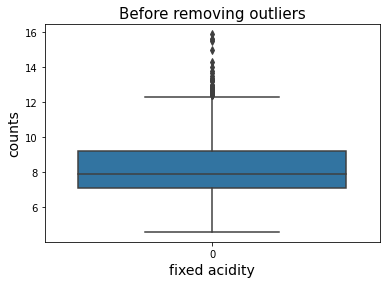

In [1375]:
#visualize the outliers by using boxplot
sns.boxplot(data = df['fixed acidity'])
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('fixed acidity', fontsize= 14)
plt.ylabel('counts', fontsize = 14)

Text(0.5, 0, 'fixed acidity')

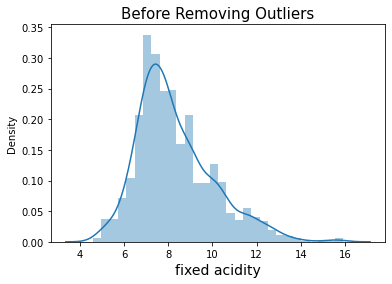

In [1376]:
#visualize the normalization curve by using distplot
sns.distplot(df['fixed acidity'])
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('fixed acidity', fontsize= 14)

In [1377]:
df['fixed acidity'].describe() #check the missing value, mean, std, quartile and iqr
#As we clearly see the gap between maximum value and 75% 

count    1359.000000
mean        8.310596
std         1.736990
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [1378]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['fixed acidity'], 32,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['fixed acidity'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['fixed acidity'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['fixed acidity'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 1.6000000000000005

 **************************************************
Higher range:-
 (array([ 174,  182,  188,  212,  214,  232,  233,  237,  244,  248,  251,
        255,  283,  285,  291,  294,  295,  296,  299,  302,  308,  311,
        313,  314,  317,  318,  319,  328,  329,  330,  331,  334,  344,
        345,  347,  350,  351,  355,  357,  366,  375,  377,  378,  383,
        384,  385,  389,  392,  397,  400,  405,  409,  411,  413,  427,
        444,  445,  449,  463,  467,  473,  477,  483,  485,  486,  487,
        494,  498,  503,  504,  505,  506,  517,  518,  520,  522,  531,
        536,  537,  538,  565,  569,  575,  578,  588,  605,  644,  701,
        704,  719,  738,  799,  835,  868,  902,  926, 1042, 1095, 1139,
       1152, 1233], dtype=int64),)

 **************************************************
Lower range:- 
 (array([41, 87], dtype=int64),)


In [1379]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1359, 12)
New Shape:------>  (1256, 12)


Text(0, 0.5, 'Density')

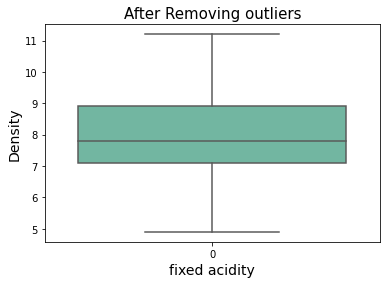

In [1380]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["fixed acidity"], palette="Set2", dodge=True)
plt.title('After Removing outliers', fontsize=15)
plt.xlabel('fixed acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [1381]:
df['fixed acidity'].describe() #check the affect of removed outliers on parameters

count    1256.000000
mean        7.992675
std         1.326353
min         4.900000
25%         7.100000
50%         7.800000
75%         8.900000
max        11.200000
Name: fixed acidity, dtype: float64

Text(0, 0.5, 'Density')

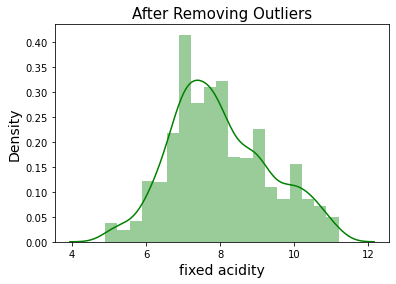

In [1382]:
# Visualize the distplot after removing outliers
sns.distplot(df['fixed acidity'], color='green', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('fixed acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

correlation between the Features and with label:-----> (12, 12)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

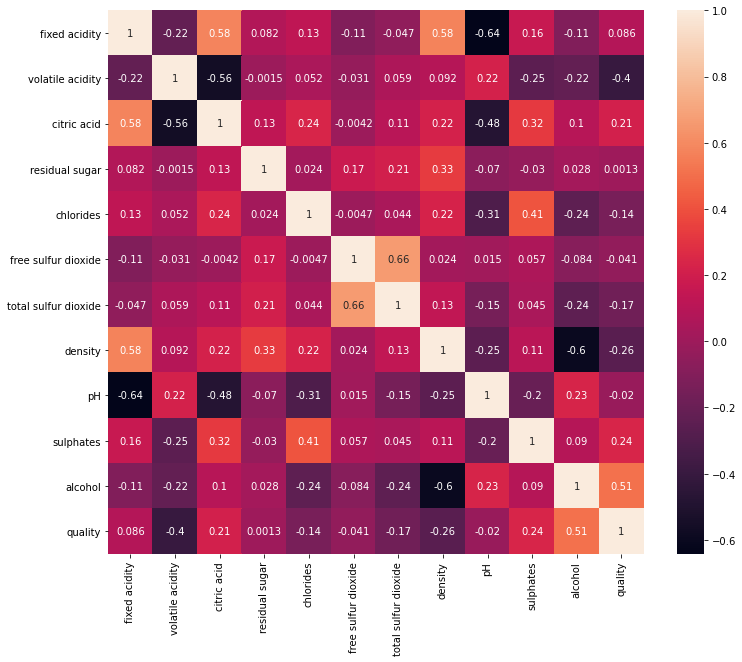

In [1383]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)

# Now, Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show  #Earlier the correlation between thsi column to label is 0.12 but now, it reduces to 0.086

In [1384]:
# Calculate mean, median, mode and std to check the normalization curve after removing outliers
print('Mean of the column:----->',df['fixed acidity'].mean())
print('Median of the column:----->',df['fixed acidity'].median())
print('Mode of the column:----->',st.mode(df['fixed acidity']))
print('std of the column:----->',df['fixed acidity'].std())

Mean of the column:-----> 7.992675159235685
Median of the column:-----> 7.8
Mode of the column:-----> 7.2
std of the column:-----> 1.3263533602426898


Conclusion for this column:
1. Our mean, median and mode values are looking good now
2. But correlation of this column to label has decreased some values, now, it is 0.086

In [1385]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1256, 12)


# Column2: Volatile acidity

In [1386]:
#check the null values, zero values in this column
df['volatile acidity'].unique()

array([0.7  , 0.88 , 0.76 , 0.28 , 0.66 , 0.6  , 0.65 , 0.58 , 0.5  ,
       0.615, 0.61 , 0.62 , 0.56 , 0.59 , 0.32 , 0.22 , 0.39 , 0.43 ,
       0.49 , 0.4  , 0.41 , 0.71 , 0.645, 0.675, 0.685, 0.655, 0.605,
       0.38 , 1.13 , 0.45 , 0.67 , 0.935, 0.29 , 0.31 , 0.52 , 0.51 ,
       0.42 , 0.63 , 0.69 , 0.735, 0.725, 0.705, 0.785, 0.75 , 0.625,
       0.3  , 0.55 , 1.02 , 0.775, 0.9  , 0.545, 0.575, 0.33 , 0.54 ,
       1.07 , 0.695, 1.33 , 0.745, 1.04 , 0.715, 0.415, 0.34 , 0.68 ,
       0.95 , 0.53 , 0.64 , 0.885, 0.805, 0.73 , 0.37 , 0.835, 1.09 ,
       0.57 , 0.44 , 0.635, 0.82 , 0.48 , 1.   , 0.35 , 0.975, 0.87 ,
       0.27 , 0.2  , 0.36 , 0.83 , 0.18 , 0.46 , 0.47 , 0.77 , 0.815,
       0.795, 0.665, 0.21 , 0.765, 0.24 , 0.26 , 0.85 , 0.84 , 0.96 ,
       0.78 , 0.23 , 0.365, 0.25 , 0.825, 0.72 , 0.595, 0.585, 0.915,
       0.755, 0.845, 1.24 , 0.8  , 0.98 , 1.185, 0.92 , 1.035, 1.025,
       0.565, 0.74 , 1.115, 0.865, 0.875, 0.965, 0.91 , 0.89 , 1.01 ,
       0.305, 0.395,

In [1387]:
df['volatile acidity'].describe() #check the missing value, mean, std, quartile and iqr
#As we clearly see the gap between minumum and 25% & maximum and 75% in this column

count    1256.000000
mean        0.537273
std         0.185079
min         0.120000
25%         0.400000
50%         0.530000
75%         0.650000
max         1.580000
Name: volatile acidity, dtype: float64

In [1388]:
#check the zero value
df['volatile acidity'].all()

True

In [1389]:
#count the value of each datapoint
df['volatile acidity'].value_counts()

0.500    34
0.580    33
0.400    32
0.430    31
0.590    29
         ..
1.090     1
0.865     1
0.565     1
0.975     1
1.180     1
Name: volatile acidity, Length: 142, dtype: int64

correlation between the Features and with label:-----> (12, 12)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

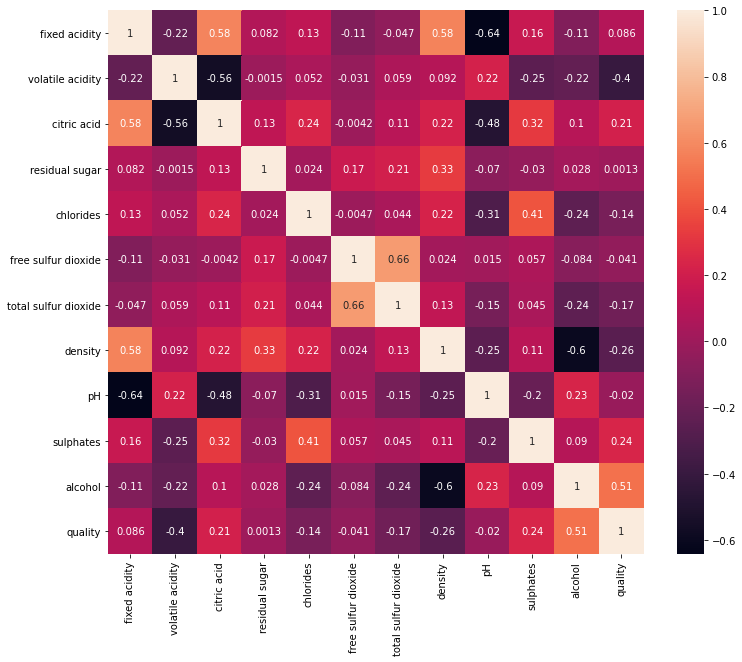

In [1390]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.4 right now

In [1391]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['volatile acidity'].mean())
print('Median of the column:----->',df['volatile acidity'].median())
print('Mode of the column:----->',st.mode(df['volatile acidity']))
print('std of the column:----->',df['volatile acidity'].std())
#we can see mode value is not upto mean and median value because of some outliers

Mean of the column:-----> 0.5372730891719744
Median of the column:-----> 0.53
Mode of the column:-----> 0.5
std of the column:-----> 0.18507936346661244


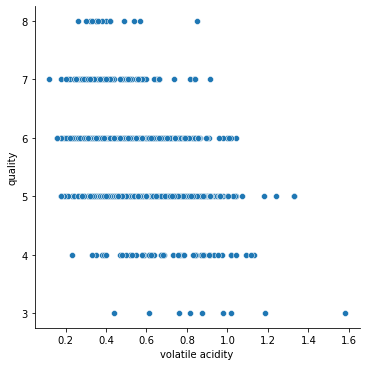

In [1392]:
# Visualize the outliers by using relational plot 
sns.relplot(data= df, x = 'volatile acidity', y='quality')

Text(0.5, 0, 'volatile acidity')

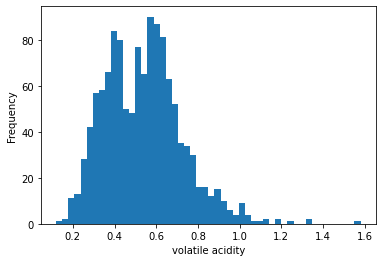

In [1393]:
# visualize the outliers by histogram
df['volatile acidity'].plot(kind ='hist', bins=50)
plt.xlabel('volatile acidity')

Text(0, 0.5, 'counts')

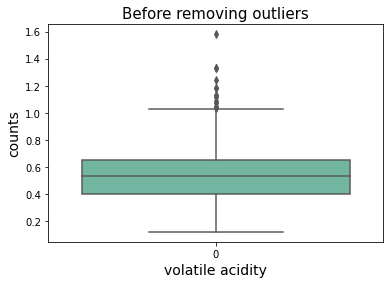

In [1394]:
# Visualize the boxplot before removing outliers
ax = sns.boxplot(data=df["volatile acidity"], palette="Set2", dodge=True)
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('volatile acidity', fontsize=14)
plt.ylabel('counts', fontsize=14)

Text(0, 0.5, 'Counts')

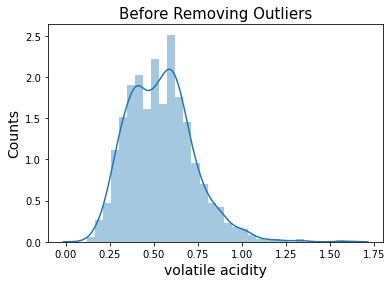

In [1395]:
# Visualize the boxplot before removing outliers
sns.distplot(df['volatile acidity'], rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('volatile acidity', fontsize=14)
plt.ylabel('Counts', fontsize=14)

In [1396]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['volatile acidity'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['volatile acidity'], 60,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['volatile acidity'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['volatile acidity'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.17999999999999994

 **************************************************
Higher range:-
 (array([   1,   35,   41,   85,   88,  107,  112,  113,  119,  139,  149,
        173,  203,  222,  225,  307,  328,  418,  444,  467,  470,  471,
        472,  482,  496,  505,  510,  511,  518,  522,  527,  539,  543,
        545,  549,  564,  565,  566,  581,  598,  648,  671,  678,  742,
        766,  787,  790,  906,  908,  916,  918,  920,  975, 1006, 1008,
       1017, 1031, 1052, 1065, 1094, 1116, 1131, 1141, 1142, 1150, 1155,
       1167, 1207, 1219, 1221], dtype=int64),)

 **************************************************
Lower range:- 
 (array([716], dtype=int64),)


In [1397]:
#first check the old shape 
print("Old Shape: ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

Old Shape:  (1256, 12)
New Shape:  (1185, 12)


Text(0, 0.5, 'counts')

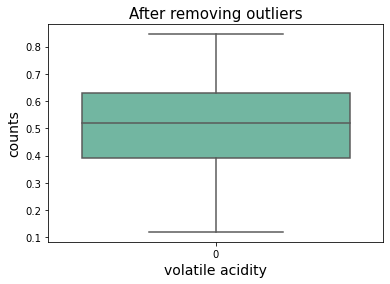

In [1398]:
# Visualize the boxplot after removing outliers
sns.boxplot(data=df["volatile acidity"], palette="Set2", dodge=False)
plt.title('After removing outliers', fontsize=15)
plt.xlabel('volatile acidity', fontsize=14)
plt.ylabel('counts', fontsize=14)

Text(0, 0.5, 'Density')

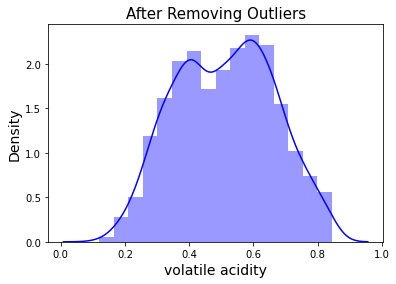

In [1399]:
# Visualize the boxplot after removing outliers
sns.distplot(df['volatile acidity'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('volatile acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [1400]:
df['volatile acidity'].describe() #now, check the quartiles and interqaurtiles parameters

count    1185.000000
mean        0.511684
std         0.153231
min         0.120000
25%         0.390000
50%         0.520000
75%         0.630000
max         0.845000
Name: volatile acidity, dtype: float64

correlation between the Features and with label:-----> (12, 12)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

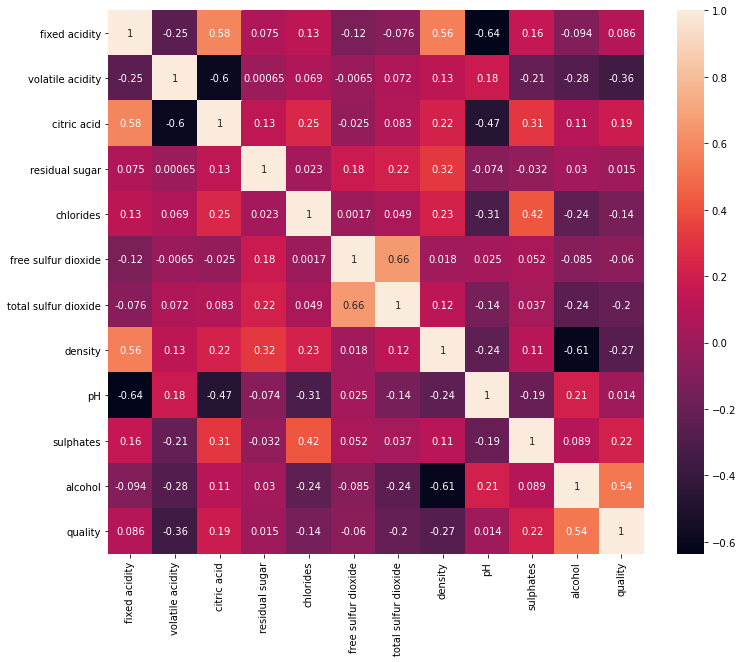

In [1401]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #earlier the relationship between this column to response is -0.4 but now it is -0.36

In [1402]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['volatile acidity'].mean())
print('Median of the column:----->',df['volatile acidity'].median())
print('Mode of the column:----->',st.mode(df['volatile acidity']))
print('std of the column:----->',df['volatile acidity'].std())

Mean of the column:-----> 0.5116835443037966
Median of the column:-----> 0.52
Mode of the column:-----> 0.5
std of the column:-----> 0.1532306001816278


Conclusionf for this column:
1. Earlier, our relatiion between this column to response is -0.4 
2. but after removing outlier, it is -0.37
3. value of mean, median and mode is improved

In [1403]:
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1185, 12)


Column3: 'citric acid'

In [1404]:
#check the null values, zero values in this column
df['citric acid'].unique()

array([0.  , 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29, 0.18, 0.19, 0.28,
       0.51, 0.48, 0.31, 0.21, 0.11, 0.14, 0.16, 0.24, 0.07, 0.12, 0.25,
       0.3 , 0.2 , 0.22, 0.52, 0.23, 0.37, 0.26, 0.15, 0.57, 0.4 , 0.49,
       0.05, 0.54, 0.64, 0.7 , 0.47, 0.44, 0.68, 0.53, 0.09, 0.1 , 0.17,
       0.01, 0.55, 1.  , 0.03, 0.42, 0.33, 0.32, 0.35, 0.58, 0.6 , 0.5 ,
       0.76, 0.46, 0.45, 0.38, 0.39, 0.66, 0.61, 0.34, 0.73, 0.63, 0.41,
       0.59, 0.27, 0.74, 0.13, 0.43, 0.65, 0.78])

In [1405]:
df['citric acid'].describe() #check the iqr and quartile parameters

count    1185.000000
mean        0.256093
std         0.181772
min         0.000000
25%         0.090000
50%         0.250000
75%         0.400000
max         1.000000
Name: citric acid, dtype: float64

In [1406]:
#check the zero value in column
df['citric acid'].all()

False

In [1407]:
#count the value of each datapoint
df['citric acid'].value_counts() #there are 103 zero values

0.00    103
0.49     39
0.24     39
0.02     35
0.08     31
       ... 
0.73      2
1.00      1
0.74      1
0.76      1
0.78      1
Name: citric acid, Length: 73, dtype: int64

In [1408]:
#replace zero value by mean of the column
df['citric acid']= df['citric acid'].replace(0.00, df['citric acid'].mean())

In [1409]:
#check after replace
df['citric acid'].all()

True

In [1410]:
#check after replacing zero values by column mean
df['citric acid'].unique()

array([0.25609283, 0.04      , 0.56      , 0.06      , 0.02      ,
       0.36      , 0.08      , 0.29      , 0.18      , 0.19      ,
       0.28      , 0.51      , 0.48      , 0.31      , 0.21      ,
       0.11      , 0.14      , 0.16      , 0.24      , 0.07      ,
       0.12      , 0.25      , 0.3       , 0.2       , 0.22      ,
       0.52      , 0.23      , 0.37      , 0.26      , 0.15      ,
       0.57      , 0.4       , 0.49      , 0.05      , 0.54      ,
       0.64      , 0.7       , 0.47      , 0.44      , 0.68      ,
       0.53      , 0.09      , 0.1       , 0.17      , 0.01      ,
       0.55      , 1.        , 0.03      , 0.42      , 0.33      ,
       0.32      , 0.35      , 0.58      , 0.6       , 0.5       ,
       0.76      , 0.46      , 0.45      , 0.38      , 0.39      ,
       0.66      , 0.61      , 0.34      , 0.73      , 0.63      ,
       0.41      , 0.59      , 0.27      , 0.74      , 0.13      ,
       0.43      , 0.65      , 0.78      ])

In [1411]:
df['citric acid'].describe() #now, our quartile and iqr parameters after replacing zero values

count    1185.000000
mean        0.278352
std         0.163829
min         0.010000
25%         0.150000
50%         0.256093
75%         0.400000
max         1.000000
Name: citric acid, dtype: float64

correlation between the Features and with label:-----> (12, 12)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

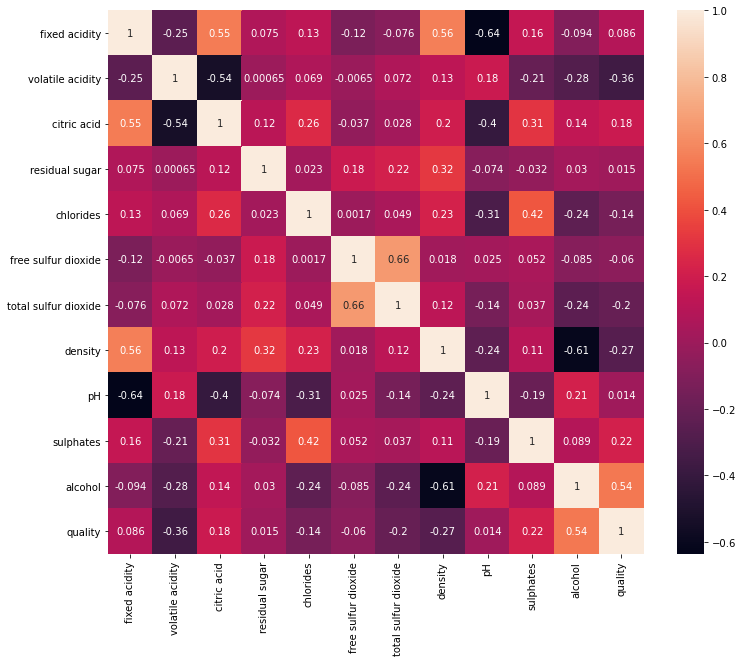

In [1412]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is 0.18 right now

In [1413]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['citric acid'].mean())
print('Median of the column:----->',df['citric acid'].median())
print('Mode of the column:----->',st.mode(df['citric acid']))
print('std of the column:----->',df['citric acid'].std()) 
#here mean value is littlebit higher than mode value and median value

Mean of the column:-----> 0.27835237230500703
Median of the column:-----> 0.25609282700421826
Mode of the column:-----> 0.25609282700421826
std of the column:-----> 0.16382864590289273


Text(0.5, 1.0, 'citric acid')

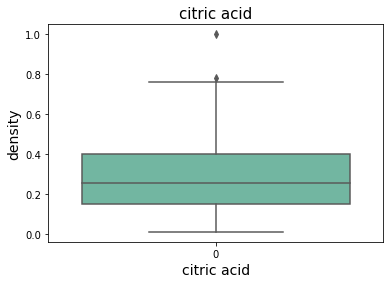

In [1414]:
# Visualize the boxplot before removing outliers
ax = sns.boxplot(data=df["citric acid"], palette="Set2", dodge=False)
plt.xlabel('citric acid', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('citric acid', fontsize=15)

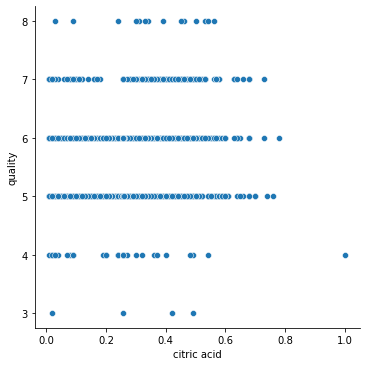

In [1415]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'citric acid', y='quality')

Text(0.5, 0, 'citric acid')

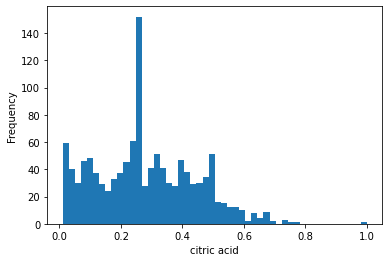

In [1416]:
# visualize by histogram
df['citric acid'].plot(kind ='hist', bins=50)
plt.xlabel('citric acid')

Text(0, 0.5, 'Density')

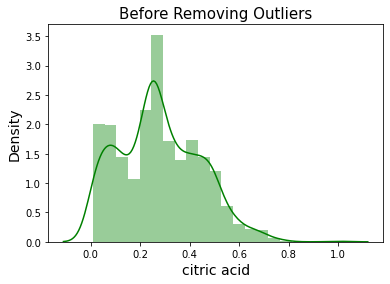

In [1417]:
# Visualize the boxplot before removing outliers
sns.distplot(df['citric acid'], color='green', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('citric acid', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [1418]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['citric acid'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['citric acid'], 65,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['citric acid'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['citric acid'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.18000000000000002

 **************************************************
Higher range:-
 (array([  66,   71,   89,  124,  206,  219,  256,  273,  277,  293,  307,
        319,  328,  334,  335,  351,  363,  366,  371,  389,  511,  528,
        760,  772,  773,  775,  921,  966, 1155, 1162, 1164], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [1419]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (1185, 12)
New Shape:  (1154, 12)


Text(0.5, 0, 'citric acid')

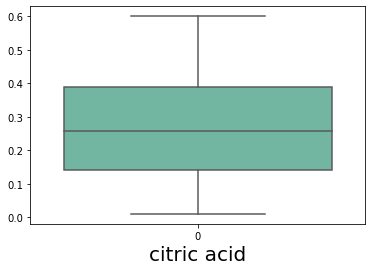

In [1420]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["citric acid"], palette="Set2", dodge=False)

plt.xlabel('citric acid', fontsize=20)

Text(0, 0.5, 'Density')

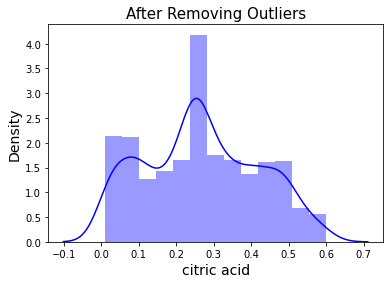

In [1421]:
# Visualize the boxplot after removing outliers
sns.distplot(df['citric acid'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('citric acid', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [1422]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df["citric acid"].mean())
print('Median of the column:----->',df["citric acid"].median())
print('Mode of the column:----->',st.mode(df["citric acid"]))
print('std of the column:----->',df["citric acid"].std())

Mean of the column:-----> 0.26746755734959554
Median of the column:-----> 0.25609282700421826
Mode of the column:-----> 0.25609282700421826
std of the column:-----> 0.15130602369493856


correlation between the Features and with label:-----> (12, 12)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

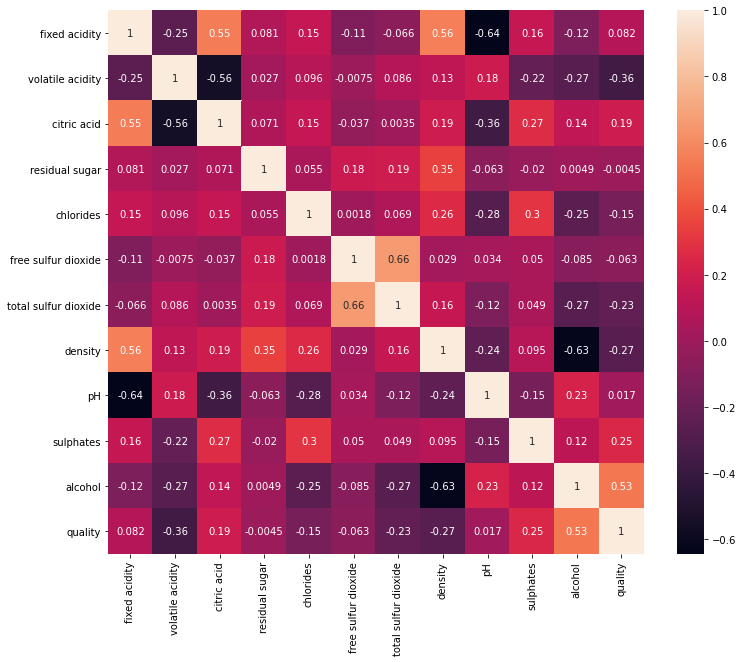

In [1423]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is 0.2 right now

In [1424]:
df["citric acid"].describe() #now check the iqr and quartile parameters

count    1154.000000
mean        0.267468
std         0.151306
min         0.010000
25%         0.142500
50%         0.256093
75%         0.390000
max         0.600000
Name: citric acid, dtype: float64

In [1425]:
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1154, 12)


Column4: residual sugar

In [1426]:
#check the null values, zero values in this column
df['residual sugar'].unique()

array([ 1.9 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,  3.9 ,
        1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,  5.9 ,
        2.8 ,  2.6 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.5 ,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.6 ,  4.  ,
        7.  ,  6.4 , 11.  ,  4.5 ,  7.9 ,  3.7 ,  6.7 ,  6.6 , 15.5 ,
        8.3 ,  3.3 ,  6.3 ,  4.6 ,  3.5 ,  6.  ,  8.6 ,  2.25,  2.85,
        4.2 ,  2.35,  2.65,  9.  ,  8.8 ,  5.  ,  4.1 ,  1.65,  2.05,
        0.9 ,  6.2 ,  8.9 ,  8.1 ,  4.7 ,  4.3 ,  1.75,  7.8 ,  5.8 ,
       12.9 , 13.4 ,  4.8 ,  2.15,  5.4 , 15.4 ,  5.2 ,  3.75, 13.8 ])

In [1427]:
df['residual sugar'].describe() #check the iqr and quartile parameters

count    1154.000000
mean        2.472357
std         1.326378
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [1428]:
#check the zero value
df['residual sugar'].all()

True

In [1429]:
#count the value of each datapoint
df['residual sugar'].value_counts()

2.00     116
1.80      97
2.20      93
2.10      90
1.90      89
        ... 
15.40      1
2.15       1
4.70       1
2.05       1
7.30       1
Name: residual sugar, Length: 81, dtype: int64

correlation between the Features and with label:-----> (12, 12)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

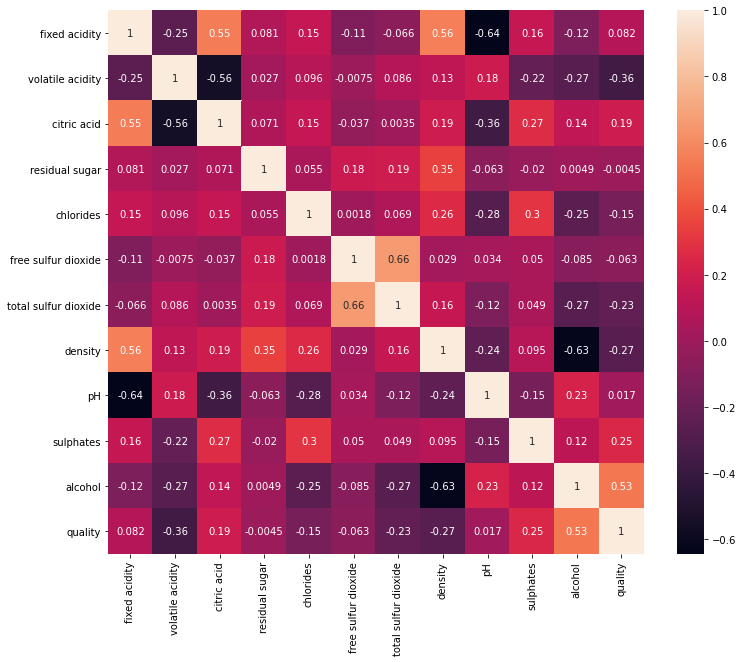

In [1430]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.0045 right now

In [1431]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df["residual sugar"].mean())
print('Median of the column:----->',df["residual sugar"].median())
print('Mode of the column:----->',st.mode(df["residual sugar"]))
print('std of the column:----->',df["residual sugar"].std())

Mean of the column:-----> 2.4723570190641246
Median of the column:-----> 2.2
Mode of the column:-----> 2.0
std of the column:-----> 1.326377988359122


Text(0.5, 0, 'residual sugar')

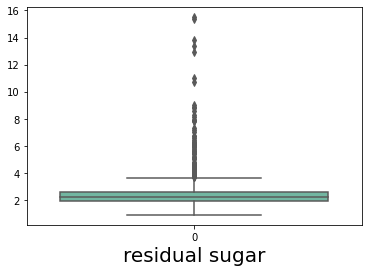

In [1432]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["residual sugar"], palette="Set2", dodge=False)

plt.xlabel('residual sugar', fontsize=20)

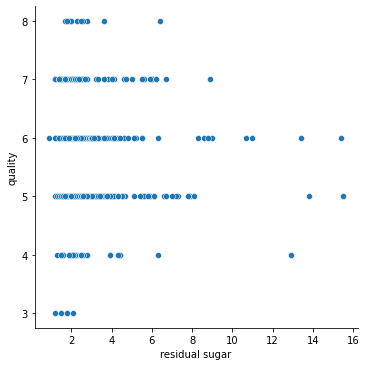

In [1433]:
# Visualize the outliers by using relational plot 
sns.relplot(data= df, x = 'residual sugar', y='quality')

Text(0, 0.5, 'Density')

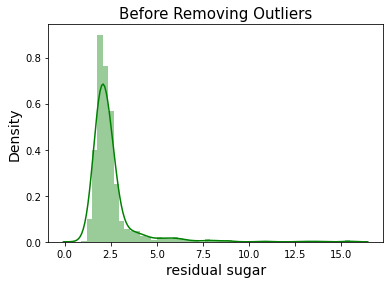

In [1434]:
# Visualize the boxplot after removing outliers
sns.distplot(df['residual sugar'], color='green', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('residual sugar', fontsize=14)
plt.ylabel('Density', fontsize=14)

Text(0.5, 0, 'residual sugar')

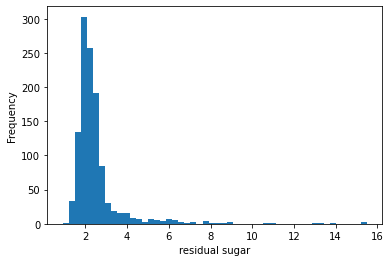

In [1435]:
# visualize by histogram
df['residual sugar'].plot(kind ='hist', bins=50)
plt.xlabel('residual sugar')

In [1436]:
#to many outliers, so, we have to drop this column
df.drop(columns=['residual sugar'], inplace=True)

In [1437]:
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1154, 11)


# Column5: chlorides

In [1438]:
#check the null values, zero values in this column
df['chlorides'].unique()

array([0.076, 0.092, 0.075, 0.069, 0.065, 0.073, 0.071, 0.097, 0.089,
       0.114, 0.176, 0.17 , 0.368, 0.086, 0.341, 0.077, 0.082, 0.106,
       0.084, 0.085, 0.08 , 0.105, 0.083, 0.103, 0.066, 0.074, 0.088,
       0.332, 0.05 , 0.113, 0.068, 0.081, 0.11 , 0.07 , 0.111, 0.079,
       0.115, 0.094, 0.104, 0.401, 0.062, 0.107, 0.102, 0.091, 0.122,
       0.09 , 0.119, 0.146, 0.072, 0.118, 0.049, 0.06 , 0.117, 0.087,
       0.236, 0.095, 0.1  , 0.36 , 0.067, 0.27 , 0.099, 0.046, 0.056,
       0.054, 0.039, 0.101, 0.057, 0.337, 0.078, 0.263, 0.063, 0.343,
       0.098, 0.186, 0.112, 0.213, 0.214, 0.093, 0.096, 0.061, 0.052,
       0.159, 0.064, 0.059, 0.174, 0.045, 0.127, 0.413, 0.152, 0.053,
       0.055, 0.051, 0.125, 0.2  , 0.171, 0.226, 0.25 , 0.108, 0.058,
       0.148, 0.124, 0.222, 0.157, 0.422, 0.034, 0.243, 0.241, 0.19 ,
       0.126, 0.038, 0.044, 0.041, 0.165, 0.048, 0.145, 0.012, 0.109,
       0.194, 0.132, 0.161, 0.12 , 0.116, 0.414, 0.047, 0.216, 0.043,
       0.178, 0.042,

In [1439]:
df['chlorides'].describe() #check the iqr and quartile range parameters

count    1154.000000
mean        0.085692
std         0.040576
min         0.012000
25%         0.069000
50%         0.078000
75%         0.089000
max         0.422000
Name: chlorides, dtype: float64

In [1440]:
#check the zero value
df['chlorides'].all()

True

In [1441]:
#count the value of each datapoint
df['chlorides'].value_counts()

0.080    46
0.078    41
0.074    37
0.076    37
0.077    35
         ..
0.341     1
0.168     1
0.174     1
0.125     1
0.166     1
Name: chlorides, Length: 140, dtype: int64

correlation between the Features and with label:-----> (11, 11)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

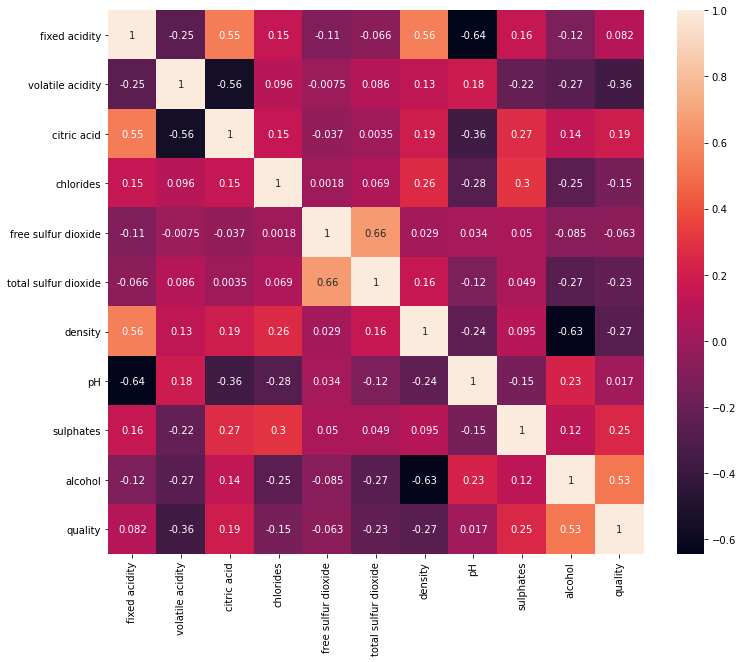

In [1442]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.15 right now

In [1443]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['chlorides'].mean())
print('Median of the column:----->',df['chlorides'].median())
print('Mode of the column:----->',st.mode(df['chlorides']))
print('std of the column:----->',df['chlorides'].std())

Mean of the column:-----> 0.08569237435008638
Median of the column:-----> 0.078
Mode of the column:-----> 0.08
std of the column:-----> 0.040575604726907875


Text(0, 0.5, 'density')

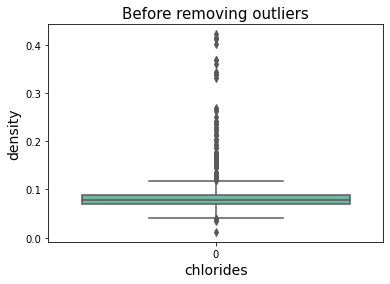

In [1444]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["chlorides"], palette="Set2", dodge=False)
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('chlorides', fontsize=14)
plt.ylabel('density', fontsize=14)

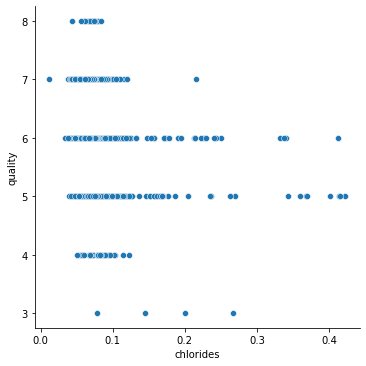

In [1445]:
# Visualize the outliers by using relational plot 
sns.relplot(data= df, x = 'chlorides', y='quality')

Text(0.5, 0, 'chlorides')

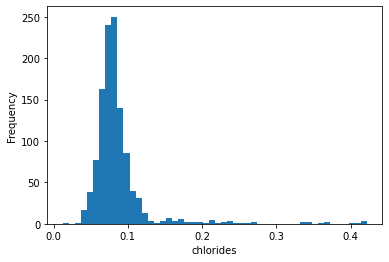

In [1446]:
# visualize by histogram
df['chlorides'].plot(kind ='hist', bins=50)
plt.xlabel('chlorides')

In [1447]:
#to many outliers, so, we drop this column
df.drop(columns=['chlorides'], inplace=True)

In [1448]:
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (1154, 10)


Column6: free sulfur dioxide

In [1449]:
#check the null values, zero values in this column
df['free sulfur dioxide'].unique()

array([11. , 15. , 17. , 13. ,  9. , 16. , 52. , 51. , 35. ,  6. , 29. ,
       23. , 10. , 21. ,  4. , 14. ,  8. , 22. , 40. ,  5. ,  3. , 12. ,
       30. , 33. , 25. , 50. , 19. , 20. , 27. , 18. , 28. , 34. , 42. ,
       37. ,  7. , 32. , 36. , 24. , 26. , 39. , 40.5, 68. , 31. , 38. ,
       43. , 47. ,  1. , 41. , 46. , 45. ,  2. ,  5.5, 53. , 57. , 48. ,
       72. , 55. , 66. ])

In [1450]:
df['free sulfur dioxide'].describe() #check the iqr and quartile range parameters

count    1154.000000
mean       16.294627
std        10.559472
min         1.000000
25%         8.000000
50%        14.000000
75%        22.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

In [1451]:
#check the zero value
df['free sulfur dioxide'].all()

True

In [1452]:
#count the value of each datapoint
df['free sulfur dioxide'].value_counts()

6.0     88
5.0     68
15.0    57
9.0     52
16.0    51
12.0    51
10.0    48
7.0     45
8.0     43
17.0    43
11.0    43
13.0    42
14.0    38
18.0    38
21.0    35
3.0     34
4.0     29
19.0    28
24.0    26
26.0    26
20.0    22
23.0    22
27.0    21
28.0    18
29.0    17
34.0    17
25.0    16
32.0    16
22.0    14
30.0    12
31.0    11
35.0    11
33.0     9
36.0     8
38.0     6
40.0     5
39.0     4
41.0     4
52.0     3
51.0     3
37.0     3
48.0     3
42.0     3
45.0     3
43.0     3
50.0     2
1.0      2
55.0     1
53.0     1
47.0     1
2.0      1
40.5     1
66.0     1
5.5      1
46.0     1
57.0     1
68.0     1
72.0     1
Name: free sulfur dioxide, dtype: int64

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

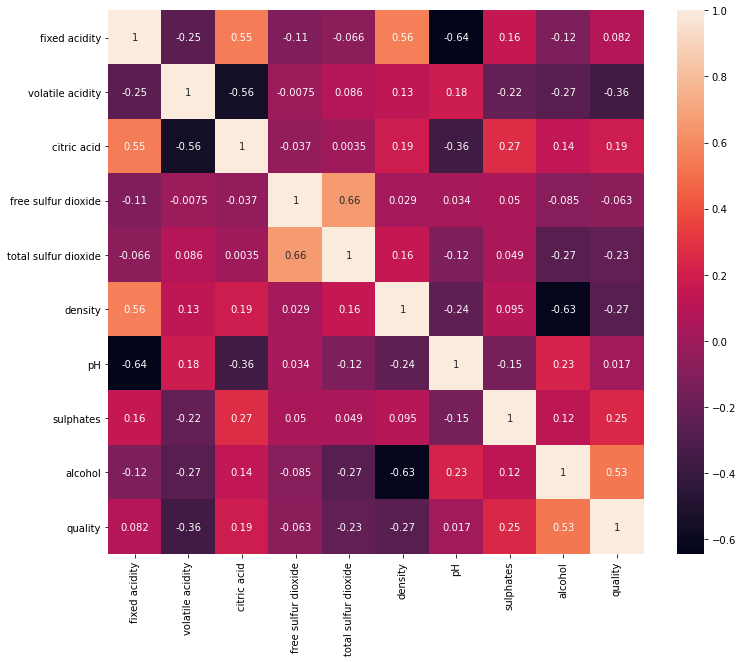

In [1453]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)

# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.063 right now

In [1454]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['free sulfur dioxide'].mean())
print('Median of the column:----->',df['free sulfur dioxide'].median())
print('Mode of the column:----->',st.mode(df['free sulfur dioxide']))
print('std of the column:----->',df['free sulfur dioxide'].std())

Mean of the column:-----> 16.294627383015598
Median of the column:-----> 14.0
Mode of the column:-----> 6.0
std of the column:-----> 10.559472126751494


Text(0, 0.5, 'density')

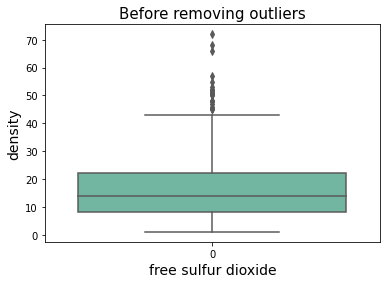

In [1455]:
# Visualize the boxplot before removing outliers
ax = sns.boxplot(data=df["free sulfur dioxide"], palette="Set2", dodge=False)
plt.title('Before removing outliers', fontsize=15)
plt.xlabel('free sulfur dioxide', fontsize=14)
plt.ylabel('density', fontsize=14)

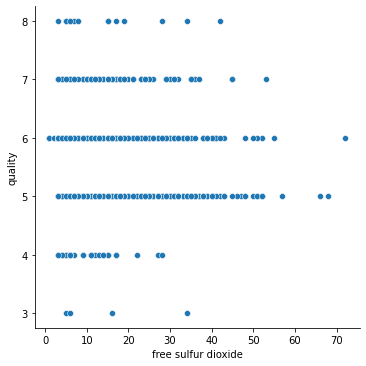

In [1456]:
# Visualize the outliers by using relational plot 
sns.relplot(data= df, x = 'free sulfur dioxide', y='quality')

Text(0.5, 0, 'free sulfur dioxide')

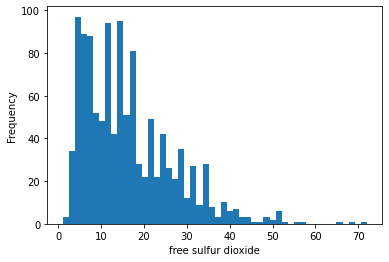

In [1457]:
# visualize by histogram
df['free sulfur dioxide'].plot(kind ='hist', bins=50)
plt.xlabel('free sulfur dioxide')

Text(0, 0.5, 'Density')

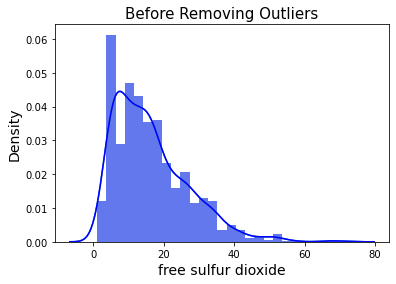

In [1458]:
sns.distplot(df['free sulfur dioxide'])
# Visualize the boxplot after removing outliers
sns.distplot(df['free sulfur dioxide'], color='blue', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('free sulfur dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [1459]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['free sulfur dioxide'], 35,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['free sulfur dioxide'], 59,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['free sulfur dioxide'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['free sulfur dioxide'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 6.0

 **************************************************
Higher range:-
 (array([  11,   12,   13,   17,   29,   45,   46,   47,   49,   59,   65,
         68,   76,   78,   89,  102,  105,  113,  115,  121,  122,  123,
        128,  129,  146,  159,  163,  168,  170,  180,  181,  190,  208,
        211,  215,  216,  222,  238,  239,  241,  242,  244,  246,  254,
        257,  264,  271,  273,  284,  291,  296,  297,  298,  299,  300,
        307,  318,  324,  325,  343,  346,  351,  353,  356,  359,  360,
        362,  363,  364,  374,  382,  383,  384,  404,  410,  413,  417,
        428,  430,  447,  450,  455,  458,  485,  487,  495,  498,  507,
        527,  533,  540,  562,  565,  567,  568,  573,  575,  580,  581,
        591,  592,  593,  594,  599,  602,  606,  607,  608,  612,  620,
        628,  629,  630,  633,  634,  639,  658,  667,  673,  674,  677,
        680,  683,  684,  691,  696,  703,  710,  711,  718,  719,  724,
        725,  726,  7

In [1460]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (1154, 10)
New Shape:  (919, 10)


Text(0.5, 1.0, 'After removing outliers')

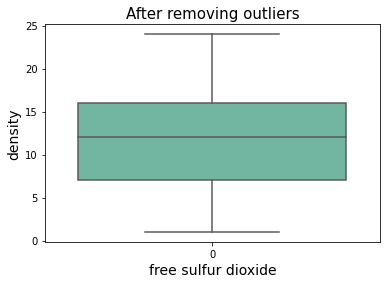

In [1461]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["free sulfur dioxide"], palette="Set2", dodge=False)

plt.xlabel('free sulfur dioxide', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('After removing outliers', fontsize=15)

Text(0, 0.5, 'Density')

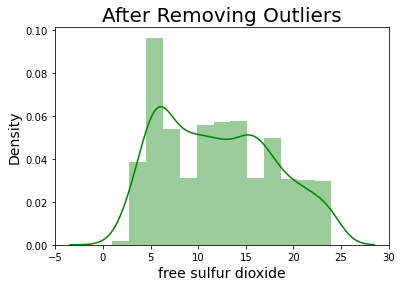

In [1462]:
# Visualize the boxplot after removing outliers
sns.distplot(df['free sulfur dioxide'], color='green', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('free sulfur dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

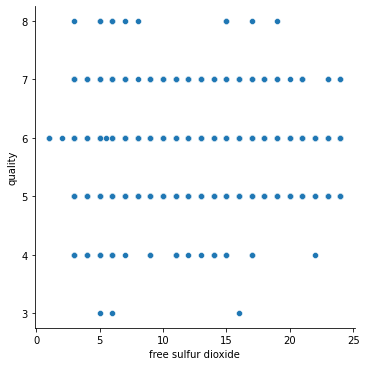

In [1463]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'free sulfur dioxide', y='quality')

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

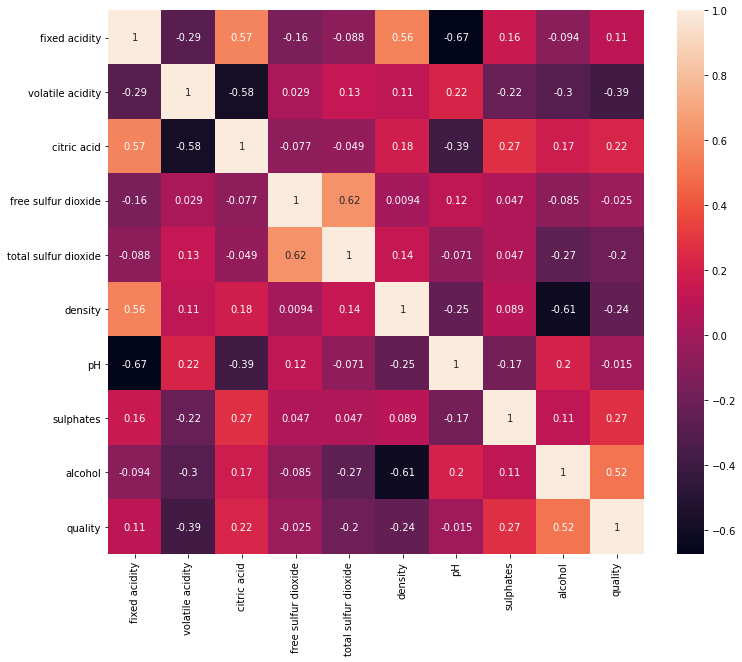

In [1464]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.025 right now

In [1465]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['free sulfur dioxide'].mean())
print('Median of the column:----->',df['free sulfur dioxide'].median())
print('Mode of the column:----->',st.mode(df['free sulfur dioxide']))
print('std of the column:----->',df['free sulfur dioxide'].std())

Mean of the column:-----> 12.049510337323177
Median of the column:-----> 12.0
Mode of the column:-----> 6.0
std of the column:-----> 5.846809576328183


In [1466]:
#max number of count is 6 which skewed our column. so, replace it by column mean
df['free sulfur dioxide']=df['free sulfur dioxide'].replace(6.0, df['free sulfur dioxide'].mean())

In [1467]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['free sulfur dioxide'].mean())
print('Median of the column:----->',df['free sulfur dioxide'].median())
print('Mode of the column:----->',st.mode(df['free sulfur dioxide']))
print('std of the column:----->',df['free sulfur dioxide'].std()) #now check the mode

Mean of the column:-----> 12.62878880270342
Median of the column:-----> 12.049510337323177
Mode of the column:-----> 12.049510337323177
std of the column:-----> 5.508274203720275


Text(0, 0.5, 'Density')

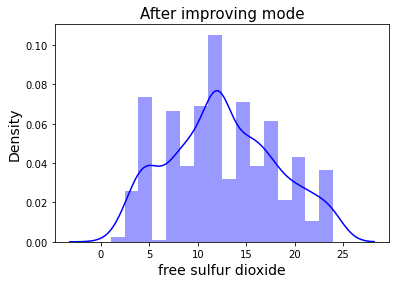

In [1468]:
# Visualize the boxplot after improving mode
sns.distplot(df['free sulfur dioxide'], color='blue', rug = False, hist = True, kde = True)
plt.title('After improving mode', fontsize=15)
plt.xlabel('free sulfur dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

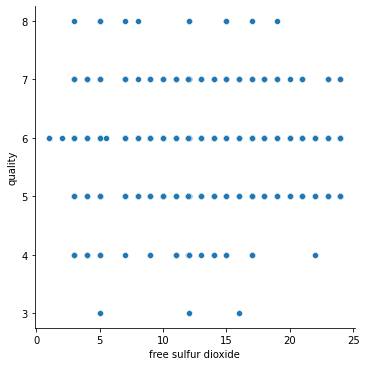

In [1469]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'free sulfur dioxide', y='quality')

In [1470]:
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (919, 10)


# Column7: total sulfur dioxide

In [1471]:
#check the null values, zero values in this column
df['total sulfur dioxide'].unique()

array([ 34.,  54.,  60.,  40.,  59.,  21.,  18., 102.,  65.,  29.,  56.,
        71.,  37.,  67.,  23.,  11.,  35.,  16.,  82., 113.,  50.,  15.,
        30.,  87.,  46.,  14.,  12.,  96.,  10.,  52., 112.,  39.,  19.,
        27.,  94.,  43.,  80.,  73.,  51.,  61., 136.,  31.,  24., 133.,
        22.,  36.,  64.,  47., 108., 111.,  62.,  28.,  89.,  13.,  99.,
        26.,  63.,  45., 105.,  20.,  88.,  86., 101.,  42.,  44.,  49.,
        38., 110., 143., 144., 127., 126., 120.,  55.,  93.,  95.,  41.,
        58.,  72., 106., 119.,  33.,  53.,  48.,  90.,  25.,  98., 114.,
        32.,  81.,  75.,  78.,  77., 122.,  66.,  17., 116., 149., 103.,
       104.,  84.,  68., 148.,   9., 125.,  57.,  74.,  92.,  85.,   7.,
         8., 115.,   6.,  70.,  79.,  69.,  91., 100., 147.])

In [1472]:
df['total sulfur dioxide'].describe() #check the iqr and quartile parameters

count    919.000000
mean      39.751904
std       28.203112
min        6.000000
25%       19.000000
50%       31.000000
75%       50.000000
max      149.000000
Name: total sulfur dioxide, dtype: float64

In [1473]:
#check the zero value
df['total sulfur dioxide'].all()

True

In [1474]:
#count the value of each datapoint
df['total sulfur dioxide'].value_counts()

28.0     30
18.0     26
13.0     24
14.0     24
24.0     23
         ..
93.0      1
100.0     1
126.0     1
147.0     1
106.0     1
Name: total sulfur dioxide, Length: 119, dtype: int64

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

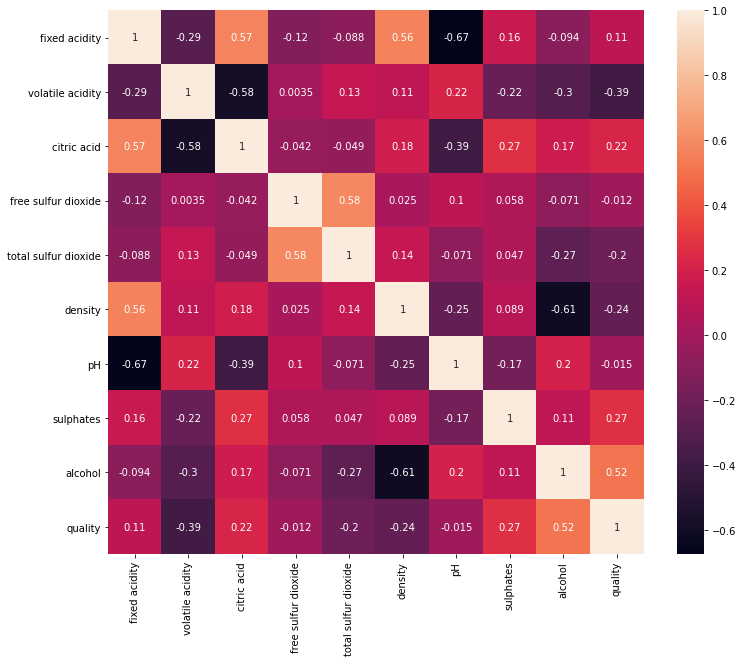

In [1475]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.2 right now

In [1476]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['total sulfur dioxide'].mean())
print('Median of the column:----->',df['total sulfur dioxide'].median())
print('Mode of the column:----->',st.mode(df['total sulfur dioxide']))
print('std of the column:----->',df['total sulfur dioxide'].std())

Mean of the column:-----> 39.7519042437432
Median of the column:-----> 31.0
Mode of the column:-----> 28.0
std of the column:-----> 28.203111630264587


Text(0.5, 1.0, 'before removing outliers')

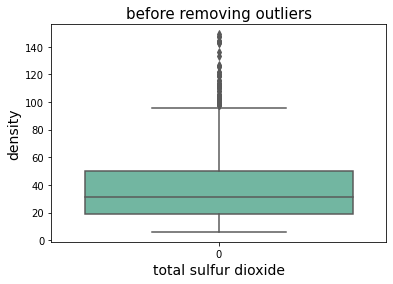

In [1477]:
# Visualize the boxplot before removing outliers
ax = sns.boxplot(data=df["total sulfur dioxide"], palette="Set2", dodge=False)

plt.xlabel('total sulfur dioxide', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('before removing outliers', fontsize=15)

Text(0, 0.5, 'Density')

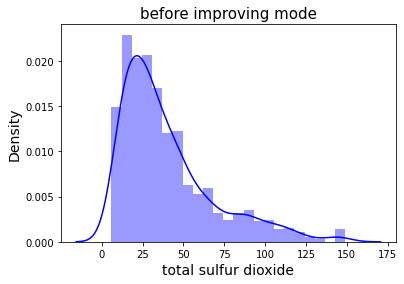

In [1478]:
# Visualize the boxplot after improving mode
sns.distplot(df['total sulfur dioxide'], color='blue', rug = False, hist = True, kde = True)
plt.title('before improving mode', fontsize=15)
plt.xlabel('total sulfur dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

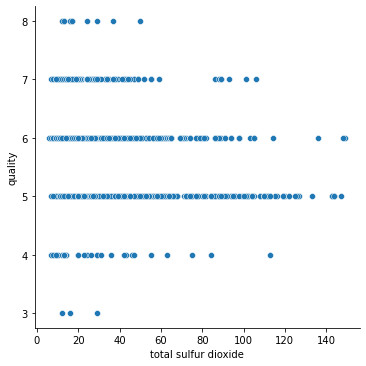

In [1479]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'total sulfur dioxide', y='quality')

Text(0.5, 0, 'total sulfur dioxide')

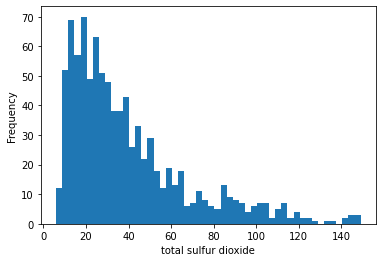

In [1480]:
# visualize by histogram
df['total sulfur dioxide'].plot(kind ='hist', bins=50)
plt.xlabel('total sulfur dioxide')

In [1481]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['total sulfur dioxide'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['total sulfur dioxide'], 50,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['total sulfur dioxide'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['total sulfur dioxide'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 12.0

 **************************************************
Higher range:-
 (array([  1,   2,   4,   7,   8,   9,  11,  13,  14,  16,  22,  24,  25,
        29,  36,  41,  43,  44,  46,  52,  53,  56,  58,  59,  60,  62,
        65,  69,  71,  73,  74,  76,  77,  79,  82,  83,  86,  89,  91,
        92,  94,  95,  97,  98, 103, 106, 107, 110, 114, 118, 120, 121,
       122, 124, 125, 126, 127, 128, 130, 131, 132, 134, 137, 140, 142,
       145, 146, 147, 150, 153, 154, 155, 158, 160, 161, 166, 167, 169,
       173, 176, 180, 181, 193, 195, 199, 200, 201, 202, 204, 207, 220,
       221, 223, 226, 227, 229, 233, 234, 242, 243, 245, 250, 251, 252,
       260, 265, 280, 283, 290, 295, 304, 317, 319, 320, 324, 325, 327,
       328, 333, 336, 340, 341, 342, 345, 348, 353, 358, 362, 373, 380,
       381, 382, 385, 387, 393, 396, 398, 403, 406, 408, 412, 414, 415,
       418, 419, 424, 425, 426, 428, 429, 435, 438, 439, 440, 441, 442,
       443, 446, 450, 463, 477, 

In [1482]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (919, 10)
New Shape:  (671, 10)


Text(0.5, 1.0, 'After removing outliers')

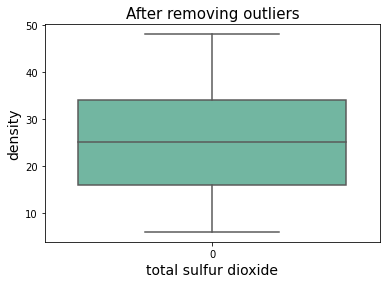

In [1483]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["total sulfur dioxide"], palette="Set2", dodge=False)

plt.xlabel('total sulfur dioxide', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('After removing outliers', fontsize=15)

Text(0, 0.5, 'Density')

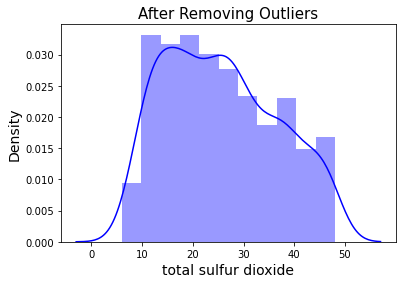

In [1484]:
# Visualize the boxplot after removing outliers
sns.distplot(df['total sulfur dioxide'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('total sulfur dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

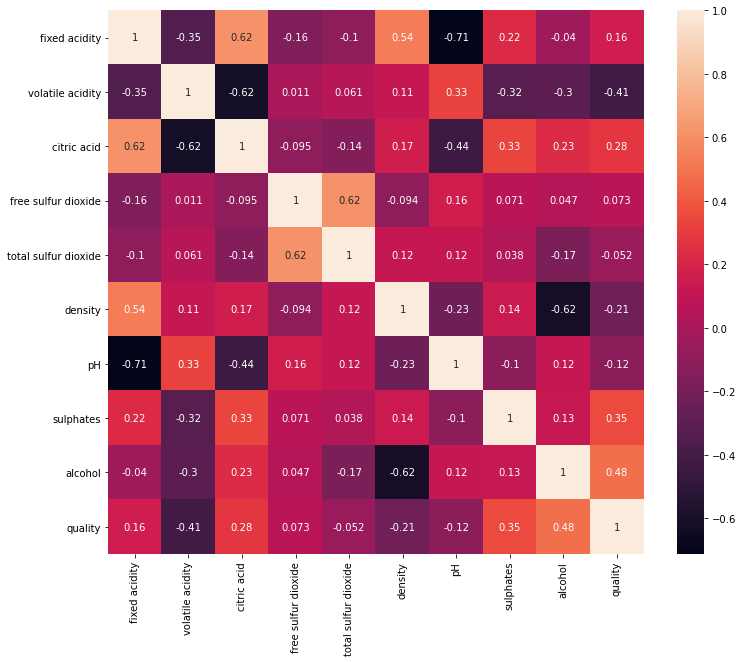

In [1485]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.052 right now

In [1486]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['total sulfur dioxide'].mean())
print('Median of the column:----->',df['total sulfur dioxide'].median())
print('Mode of the column:----->',st.mode(df['total sulfur dioxide']))
print('std of the column:----->',df['total sulfur dioxide'].std())

Mean of the column:-----> 25.60059612518629
Median of the column:-----> 25.0
Mode of the column:-----> 28.0
std of the column:-----> 11.027168603286098


In [1487]:
df['total sulfur dioxide'].describe() #check the iqr and quartile range parameters

count    671.000000
mean      25.600596
std       11.027169
min        6.000000
25%       16.000000
50%       25.000000
75%       34.000000
max       48.000000
Name: total sulfur dioxide, dtype: float64

In [1488]:
print('Actual shape of our Dataset now :-------->', df.shape) #now, check the shape of our dataset

Actual shape of our Dataset now :--------> (671, 10)


Column8: density

In [1489]:
#check the null values, zero values in this column
df['density'].unique()

array([0.9978 , 0.9946 , 0.9968 , 0.9974 , 0.9966 , 0.9955 , 0.9962 ,
       0.9972 , 0.9964 , 0.9986 , 0.9975 , 0.9976 , 0.9969 , 0.9958 ,
       0.9971 , 0.9956 , 0.9967 , 0.9961 , 0.9965 , 0.9963 , 0.9959 ,
       0.996  , 0.9988 , 0.997  , 0.998  , 0.9952 , 0.9954 , 0.9953 ,
       0.99695, 0.99615, 0.99585, 0.9957 , 0.99525, 0.99815, 0.9984 ,
       0.99685, 0.99675, 0.9983 , 0.9985 , 0.99965, 0.99625, 0.99575,
       0.9973 , 0.9987 , 0.99735, 0.9991 , 0.9979 , 0.9994 , 1.0001 ,
       0.99855, 0.9993 , 0.99845, 0.9998 , 0.9981 , 0.9948 , 0.9982 ,
       1.0004 , 0.9949 , 0.9934 , 1.0006 , 0.9947 , 0.9977 , 1.0026 ,
       0.995  , 1.     , 0.999  , 1.0002 , 0.9921 , 0.9992 , 0.99768,
       0.99761, 0.99803, 0.99738, 0.99701, 0.99888, 0.99668, 0.99727,
       0.99612, 0.99788, 0.99676, 0.99732, 0.99639, 0.99531, 0.99526,
       0.99682, 0.99356, 0.99386, 0.99702, 0.99693, 0.99562, 0.99818,
       0.99462, 0.99545, 0.99632, 0.99606, 0.99154, 0.99624, 0.9951 ,
       0.99376, 0.99

In [1490]:
df['density'].describe() #check the iqr and quartile range parameters

count    671.000000
mean       0.996318
std        0.001608
min        0.991500
25%        0.995270
50%        0.996340
75%        0.997400
max        1.002600
Name: density, dtype: float64

In [1491]:
#check the zero value
df['density'].all()

True

In [1492]:
#count the value of each datapoint
df['density'].value_counts()

0.99760    20
0.99720    16
0.99680    13
0.99620    12
0.99800    12
           ..
0.99428     1
1.00260     1
0.99634     1
0.99727     1
0.99542     1
Name: density, Length: 299, dtype: int64

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

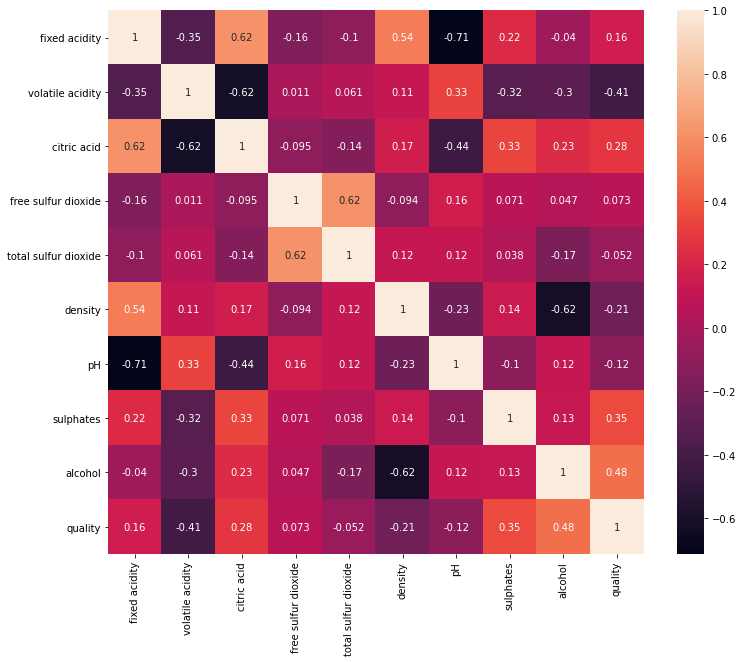

In [1493]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.21 right now

In [1494]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['density'].mean())
print('Median of the column:----->',df['density'].median())
print('Mode of the column:----->',st.mode(df['density']))
print('std of the column:----->',df['density'].std())

Mean of the column:-----> 0.996318092399404
Median of the column:-----> 0.99634
Mode of the column:-----> 0.9976
std of the column:-----> 0.0016083841702810946


Text(0.5, 1.0, 'before removing outliers')

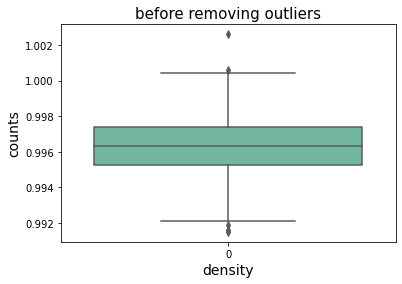

In [1495]:
# Visualize the boxplot before removing outliers
ax = sns.boxplot(data=df["density"], palette="Set2", dodge=False)

plt.xlabel('density', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.title('before removing outliers', fontsize=15)

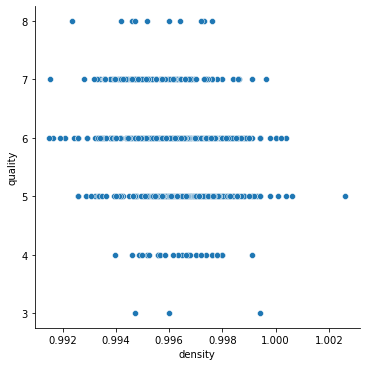

In [1496]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'density', y='quality')

Text(0.5, 0, 'density')

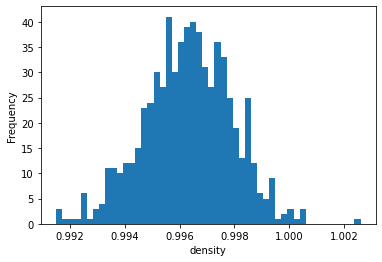

In [1497]:
# visualize by histogram
df['density'].plot(kind ='hist', bins=50)
plt.xlabel('density')

Text(0, 0.5, 'counts')

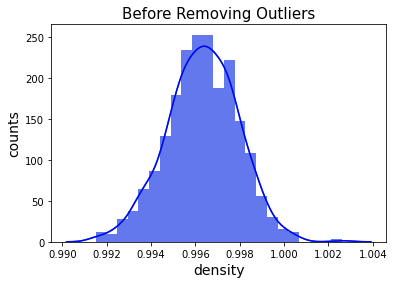

In [1498]:
sns.distplot(df['density'])
# Visualize the boxplot after removing outliers
sns.distplot(df['density'], color='blue', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('density', fontsize=14)
plt.ylabel('counts', fontsize=14)

In [1499]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['density'], 34.5,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['density'], 76,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['density'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['density'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.0017650000000000166

 **************************************************
Higher range:-
 (array([103, 126, 159, 167, 200, 211], dtype=int64),)

 **************************************************
Lower range:- 
 (array([251, 305, 387, 390, 417, 450, 451, 452, 457, 503, 526, 531, 535,
       536, 538, 568], dtype=int64),)


In [1500]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (671, 10)
New Shape:  (649, 10)


Text(0.5, 1.0, 'After removing outliers')

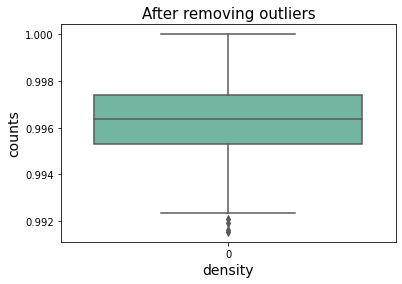

In [1501]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["density"], palette="Set2", dodge=False)

plt.xlabel('density', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.title('After removing outliers', fontsize=15)

In [1502]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['density'], 28,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['density'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['density'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['density'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.0019399999999999418

 **************************************************
Higher range:-
 (array([], dtype=int64),)

 **************************************************
Lower range:- 
 (array([245, 298, 379, 439, 441, 488, 515], dtype=int64),)


In [1503]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (649, 10)
New Shape:  (642, 10)


Text(0.5, 1.0, 'after removing outliers')

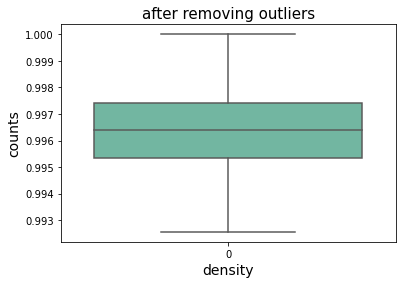

In [1504]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["density"], palette="Set2", dodge=False)

plt.xlabel('density', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.title('after removing outliers', fontsize=15)

Text(0, 0.5, 'counts')

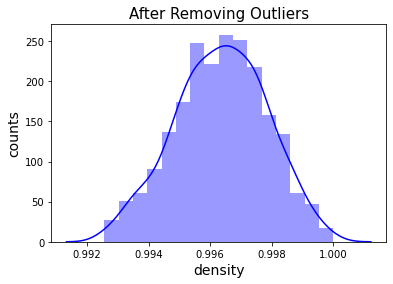

In [1505]:
# Visualize the boxplot after removing outliers
sns.distplot(df['density'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('density', fontsize=14)
plt.ylabel('counts', fontsize=14)

Text(0.5, 0, 'density')

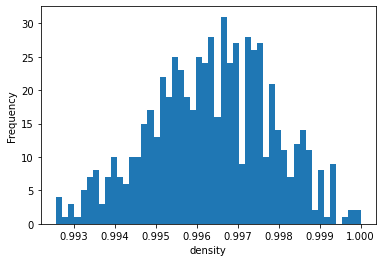

In [1506]:
# visualize by histogram
df['density'].plot(kind ='hist', bins=50)
plt.xlabel('density')

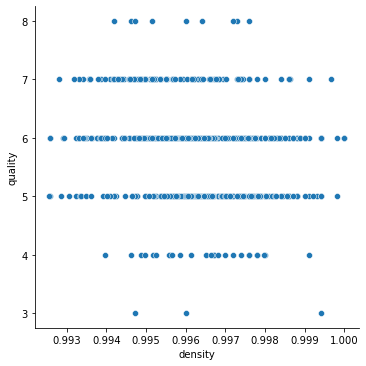

In [1507]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'density', y='quality')

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

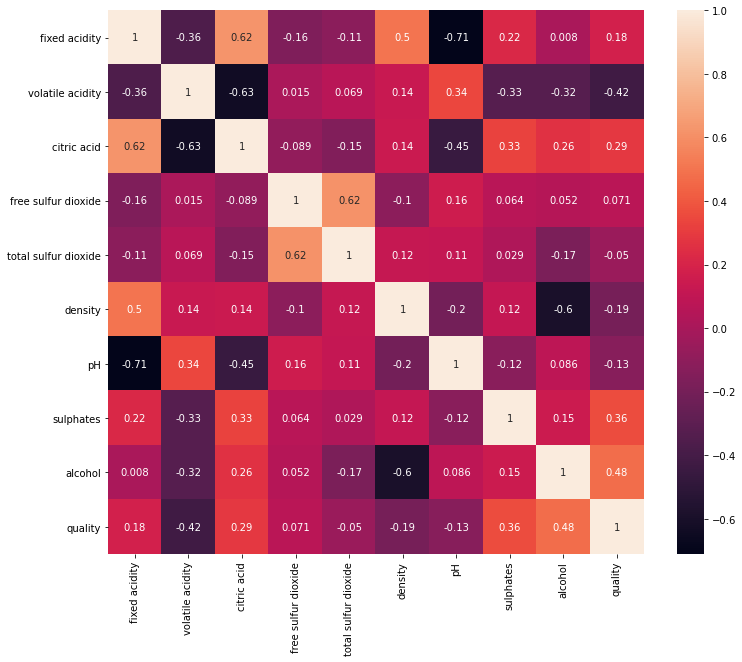

In [1508]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.19 right now

In [1509]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['density'].mean())
print('Median of the column:----->',df['density'].median())
print('Mode of the column:----->',st.mode(df['density']))
print('std of the column:----->',df['density'].std())

Mean of the column:-----> 0.9963527570093464
Median of the column:-----> 0.9963949999999999
Mode of the column:-----> 0.9976
std of the column:-----> 0.0014927136708390927


In [1510]:
df['density'].value_counts() # check the number of counts of each value

0.99760    20
0.99720    16
0.99680    13
0.99620    12
0.99800    12
           ..
0.99634     1
0.99727     1
0.99769     1
0.99646     1
0.99542     1
Name: density, Length: 281, dtype: int64

In [1511]:
df['density']=df['density'].replace(0.99720, df['density'].mean())
#replace highest number of count value by column mean

Text(0, 0.5, 'counts')

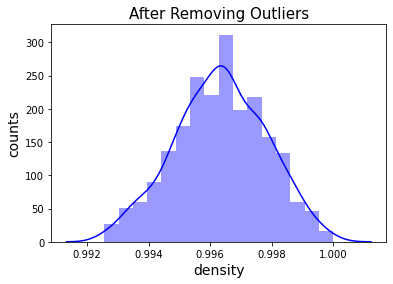

In [1512]:
# Visualize the boxplot after removing outliers
sns.distplot(df['density'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('density', fontsize=14)
plt.ylabel('counts', fontsize=14)

Text(0.5, 1.0, 'After improving mode')

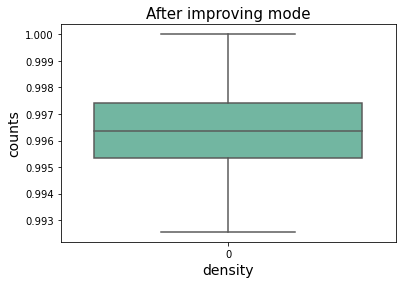

In [1513]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["density"], palette="Set2", dodge=False)

plt.xlabel('density', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.title('After improving mode', fontsize=15)

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

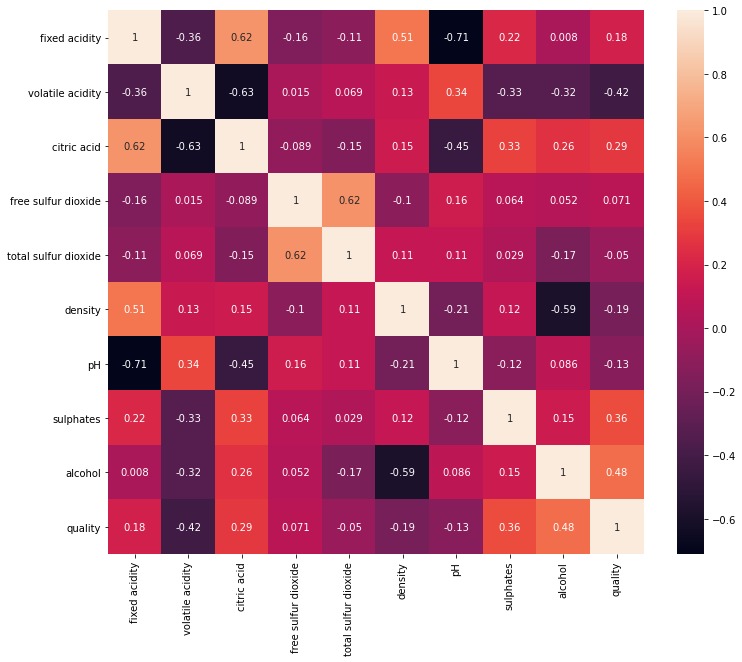

In [1514]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.19 right now

In [1515]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['density'].mean())
print('Median of the column:----->',df['density'].median())
print('Mode of the column:----->',st.mode(df['density']))
print('std of the column:----->',df['density'].std())
#now mean, median and mode are looking good

Mean of the column:-----> 0.9963316419192366
Median of the column:-----> 0.9963527570093464
Mode of the column:-----> 0.9976
std of the column:-----> 0.0014865497097395165


In [1516]:
df['density'].describe() #check the parameters

count    642.000000
mean       0.996332
std        0.001487
min        0.992560
25%        0.995345
50%        0.996353
75%        0.997400
max        1.000000
Name: density, dtype: float64

In [1517]:
print('Actual shape of our Dataset now :-------->', df.shape) #check the shape of dataset

Actual shape of our Dataset now :--------> (642, 10)


Column9: pH

In [1518]:
#check the null values, zero values in this column
df['pH'].unique()

array([3.51, 3.39, 3.36, 3.26, 3.38, 3.17, 3.43, 3.34, 3.28, 3.47, 3.46,
       3.4 , 3.42, 3.23, 3.21, 3.3 , 3.48, 3.25, 3.15, 3.04, 3.41, 3.44,
       3.32, 3.31, 3.52, 3.45, 3.33, 3.19, 3.37, 3.49, 3.53, 3.29, 3.58,
       3.22, 3.24, 3.61, 3.35, 3.69, 3.67, 3.68, 3.12, 3.18, 3.13, 3.11,
       3.27, 3.55, 3.2 , 3.1 , 3.57, 3.06, 3.14, 3.16, 3.09, 3.05, 3.56,
       2.89, 3.08, 3.66, 3.59, 3.5 , 3.71, 3.03, 3.02, 3.62, 3.01, 4.01,
       2.88, 3.72, 3.6 , 3.54])

In [1519]:
df['pH'].describe() #check the iqr and quartile range parameters

count    642.000000
mean       3.332632
std        0.133942
min        2.880000
25%        3.240000
50%        3.330000
75%        3.410000
max        4.010000
Name: pH, dtype: float64

In [1520]:
#check the zero value
df['pH'].all()

True

In [1521]:
#count the value of each datapoint
df['pH'].value_counts()

3.36    27
3.40    22
3.38    22
3.26    21
3.30    21
        ..
3.03     1
3.71     1
2.88     1
3.72     1
3.01     1
Name: pH, Length: 70, dtype: int64

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

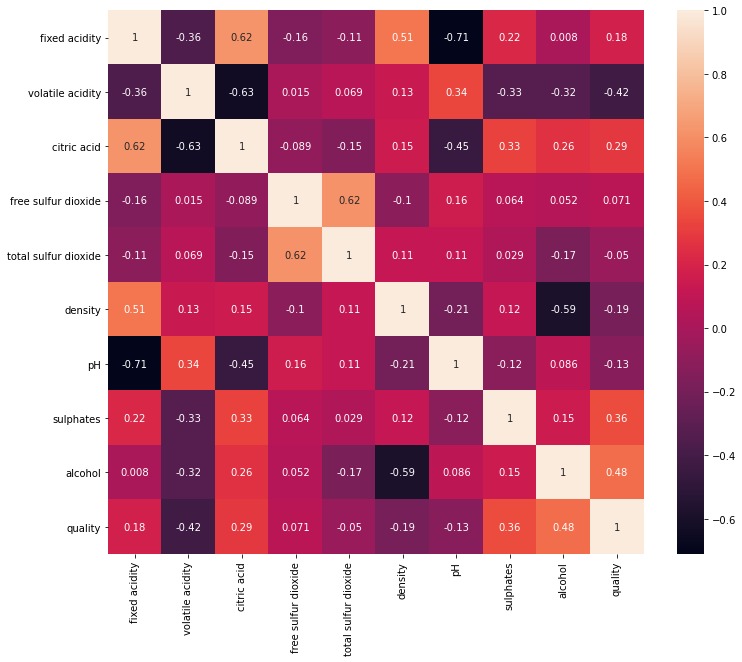

In [1522]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.13 right now

In [1523]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['pH'].mean())
print('Median of the column:----->',df['pH'].median())
print('Mode of the column:----->',st.mode(df['pH']))
print('std of the column:----->',df['pH'].std())

Mean of the column:-----> 3.332632398753896
Median of the column:-----> 3.33
Mode of the column:-----> 3.36
std of the column:-----> 0.13394209780105623


Text(0.5, 1.0, 'Before removing outliers')

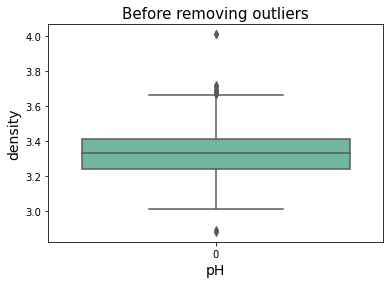

In [1524]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["pH"], palette="Set2", dodge=False)

plt.xlabel('pH', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('Before removing outliers', fontsize=15)

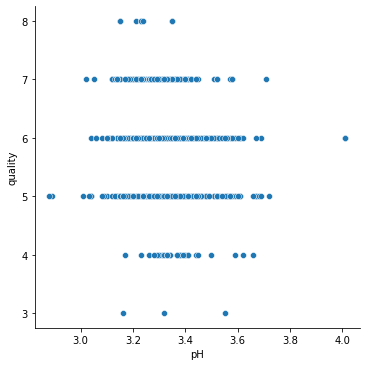

In [1525]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'pH', y='quality')

Text(0.5, 0, 'pH')

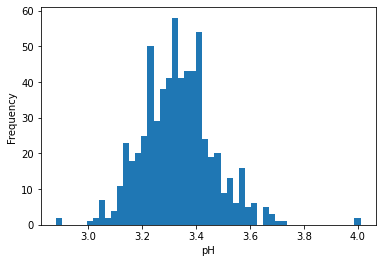

In [1526]:
# visualize by histogram
df['pH'].plot(kind ='hist', bins=50)
plt.xlabel('pH')

Text(0, 0.5, 'counts')

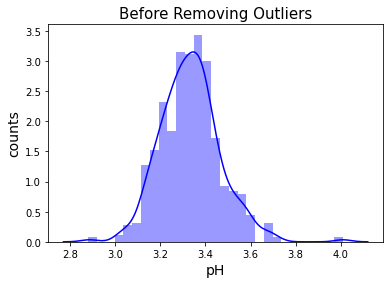

In [1527]:
# Visualize the boxplot after removing outliers
sns.distplot(df['pH'], color='blue', rug = False, hist = True, kde = True)
plt.title('Before Removing Outliers', fontsize=15)
plt.xlabel('pH', fontsize=14)
plt.ylabel('counts', fontsize=14)

In [1528]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['pH'], 33,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['pH'], 79,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['pH'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['pH'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.1499999999999999

 **************************************************
Higher range:-
 (array([ 96, 103, 104, 105, 278, 339, 375, 512, 513, 579, 585, 640],
      dtype=int64),)

 **************************************************
Lower range:- 
 (array([ 25, 165, 166, 226, 232, 403, 411, 457, 574], dtype=int64),)


In [1529]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (642, 10)
New Shape:  (621, 10)


Text(0.5, 1.0, 'removing outliers')

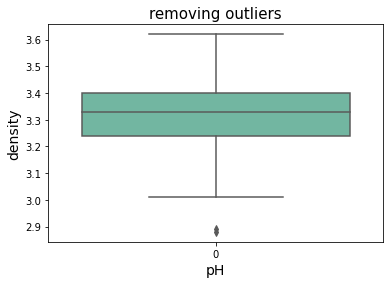

In [1530]:
# Visualize the boxplot removing outliers
ax = sns.boxplot(data=df["pH"], palette="Set2", dodge=False)

plt.xlabel('pH', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('removing outliers', fontsize=15)

In [1531]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['pH'], 27,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['pH'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['pH'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['pH'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.14000000000000012

 **************************************************
Higher range:-
 (array([ 85, 287, 331, 425, 430, 491], dtype=int64),)

 **************************************************
Lower range:- 
 (array([160, 161, 219, 224, 391, 398, 443, 557], dtype=int64),)


In [1532]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (621, 10)
New Shape:  (607, 10)


Text(0.5, 0, 'pH')

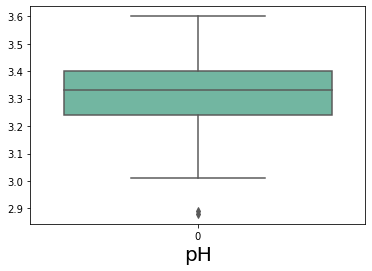

In [1533]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["pH"], palette="Set2", dodge=False)

plt.xlabel('pH', fontsize=20)

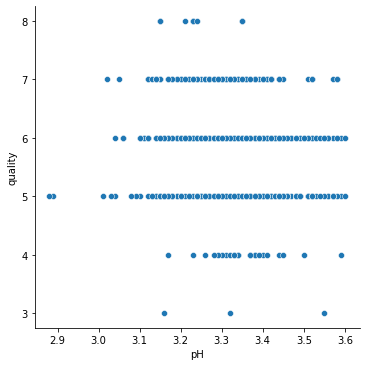

In [1534]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'pH', y='quality')

Text(0.5, 0, 'pH')

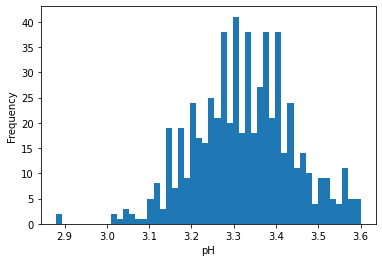

In [1535]:
# visualize by histogram
df['pH'].plot(kind ='hist', bins=50)
plt.xlabel('pH')

Text(0, 0.5, 'counts')

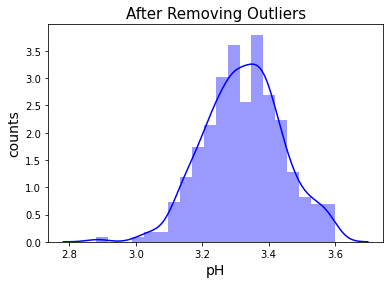

In [1536]:
# Visualize the boxplot after removing outliers
sns.distplot(df['pH'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=15)
plt.xlabel('pH', fontsize=14)
plt.ylabel('counts', fontsize=14)

In [1537]:
df['pH'].describe() #check the iqr and quartile range parameters

count    607.000000
mean       3.324201
std        0.117709
min        2.880000
25%        3.240000
50%        3.330000
75%        3.400000
max        3.600000
Name: pH, dtype: float64

In [1538]:
df['pH'].value_counts() #check the number of counts

3.36    27
3.38    22
3.26    21
3.40    21
3.39    21
        ..
3.08     1
3.09     1
3.03     1
2.88     1
3.05     1
Name: pH, Length: 61, dtype: int64

In [1539]:
df['pH']=df['pH'].replace(3.36, df['pH'].mean()) 
#replace highest number of count value by column mean to rid of skewness in curve

Text(0.5, 1.0, 'After improving mode')

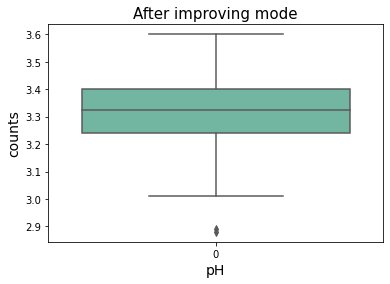

In [1540]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["pH"], palette="Set2", dodge=False)

plt.xlabel('pH', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.title('After improving mode', fontsize=15)

Text(0, 0.5, 'counts')

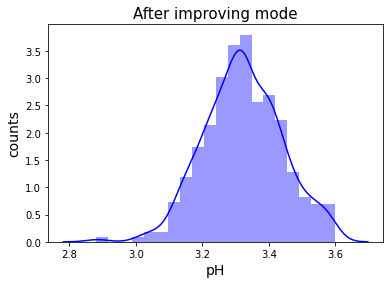

In [1541]:
# Visualize the boxplot after removing outliers
sns.distplot(df['pH'], color='blue', rug = False, hist = True, kde = True)
plt.title('After improving mode', fontsize=15)
plt.xlabel('pH', fontsize=14)
plt.ylabel('counts', fontsize=14)

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

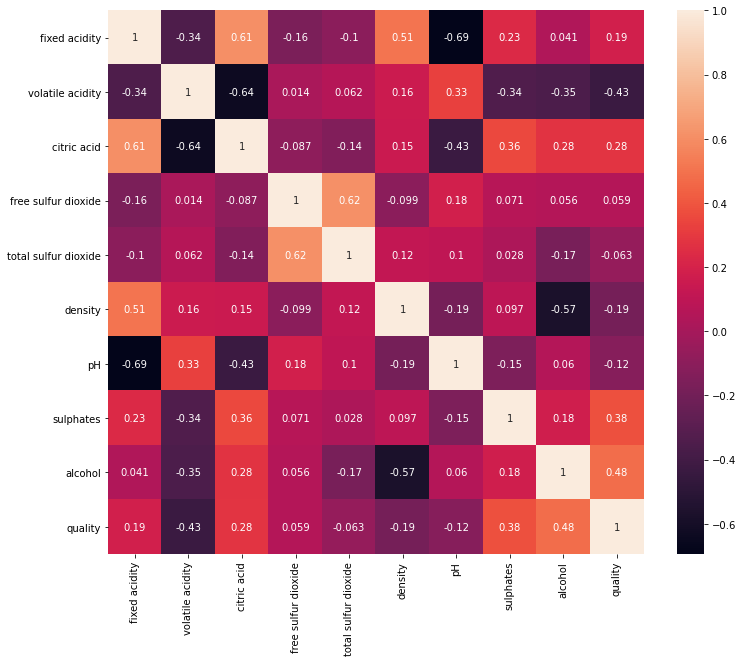

In [1542]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.14 right now

In [1543]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['pH'].mean())
print('Median of the column:----->',df['pH'].median())
print('Mode of the column:----->',st.mode(df['pH']))
print('std of the column:----->',df['pH'].std())
#now, mean, median, mode are looking good

Mean of the column:-----> 3.3226086106896795
Median of the column:-----> 3.3242009884678745
Mode of the column:-----> 3.3242009884678745
std of the column:-----> 0.11745546140236267


In [1544]:
print('Actual shape of our Dataset now :-------->', df.shape) #check the shape of the dataset

Actual shape of our Dataset now :--------> (607, 10)


Column10: sulphates

In [1545]:
#check the null values, zero values in this column
df['sulphates'].unique()

array([0.56, 0.47, 0.57, 1.56, 0.5 , 0.91, 0.63, 0.59, 0.55, 0.6 , 0.73,
       0.51, 0.9 , 1.2 , 0.52, 0.58, 0.74, 0.64, 0.54, 0.62, 0.39, 0.95,
       0.53, 0.48, 0.93, 0.67, 0.61, 0.92, 1.08, 0.49, 0.82, 0.88, 0.86,
       0.71, 0.78, 0.7 , 0.8 , 0.65, 0.77, 0.72, 0.83, 0.87, 0.75, 0.89,
       1.13, 0.76, 0.84, 1.06, 0.79, 1.05, 0.42, 1.04, 1.02, 0.68, 0.66,
       0.96, 0.69, 0.46, 0.81, 0.45, 0.44, 0.99, 0.85, 1.34, 1.1 , 0.37,
       1.03, 0.94, 0.43])

In [1546]:
df['sulphates'].describe() #check the iqr and quartile range parameters

count    607.000000
mean       0.648122
std        0.142320
min        0.370000
25%        0.550000
50%        0.620000
75%        0.720000
max        1.560000
Name: sulphates, dtype: float64

In [1547]:
#check the zero value
df['sulphates'].all()

True

In [1548]:
#count the value of each datapoint
df['sulphates'].value_counts()

0.56    29
0.60    28
0.58    27
0.55    25
0.54    22
        ..
1.08     1
0.95     1
1.56     1
1.13     1
0.96     1
Name: sulphates, Length: 69, dtype: int64

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

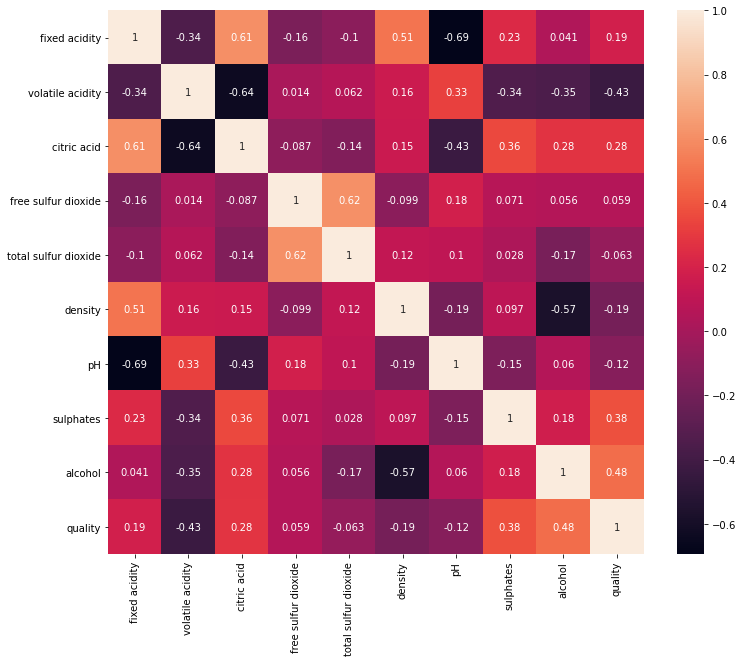

In [1549]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.21 right now

In [1550]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['sulphates'].mean())
print('Median of the column:----->',df['sulphates'].median())
print('Mode of the column:----->',st.mode(df['sulphates']))
print('std of the column:----->',df['sulphates'].std())

Mean of the column:-----> 0.6481219110378919
Median of the column:-----> 0.62
Mode of the column:-----> 0.56
std of the column:-----> 0.1423196500942248


Text(0.5, 1.0, 'before removing outliers')

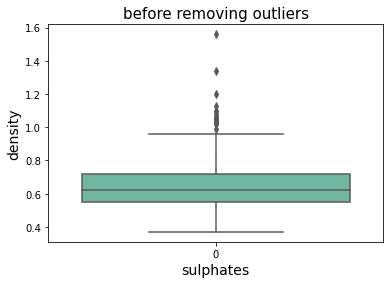

In [1551]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["sulphates"], palette="Set2", dodge=False)

plt.xlabel('sulphates', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('before removing outliers', fontsize=15)

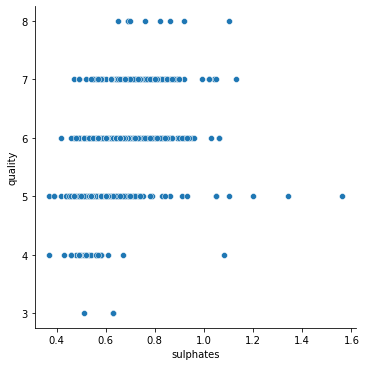

In [1552]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'sulphates', y='quality')

Text(0.5, 0, 'sulphates')

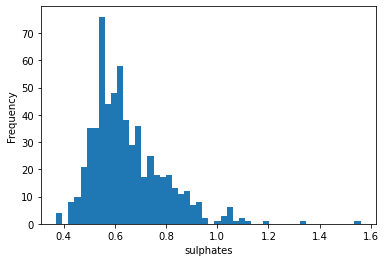

In [1553]:
# visualize by histogram
df['sulphates'].plot(kind ='hist', bins=50)
plt.xlabel('sulphates')

In [1554]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['sulphates'], 20,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['sulphates'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['sulphates'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['sulphates'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.17999999999999994

 **************************************************
Higher range:-
 (array([  4,  18,  58, 123, 146, 156, 159, 164, 165, 166, 194, 230, 330,
       384, 432, 504, 517], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [1555]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (607, 10)
New Shape:  (590, 10)


Text(0.5, 1.0, 'removing outliers')

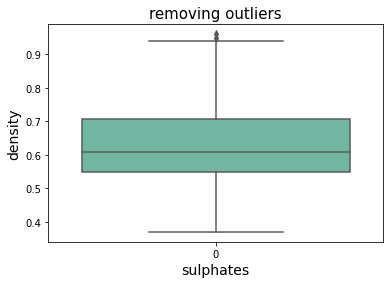

In [1556]:
# Visualize the boxplot removing outliers
ax = sns.boxplot(data=df["sulphates"], palette="Set2", dodge=False)

plt.xlabel('sulphates', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('removing outliers', fontsize=15)

In [1557]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['sulphates'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['sulphates'], 72,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['sulphates'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['sulphates'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 0.1399999999999999

 **************************************************
Higher range:-
 (array([  5,  16,  28,  41,  47, 114, 119, 133, 152, 154, 160, 194, 246,
       247, 502, 503, 578], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [1558]:
print("Old Shape: ", df.shape) #first check the old shape 

high=np.where(higher_side) #save the values in high and low
low=np.where(lower_side)

df=df.drop(df.index[high]) #removing the outliers
df=df.drop(df.index[low])

print("New Shape: ", df.shape) #now check the new shape

Old Shape:  (590, 10)
New Shape:  (573, 10)


Text(0.5, 1.0, 'After removing outliers')

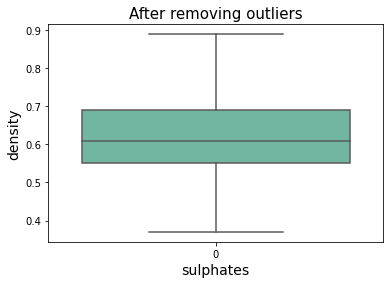

In [1559]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["sulphates"], palette="Set2", dodge=False)

plt.xlabel('sulphates', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('After removing outliers', fontsize=15)

Text(0, 0.5, 'Density')

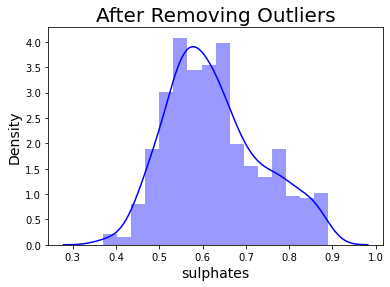

In [1560]:
# Visualize the boxplot after removing outliers
sns.distplot(df['sulphates'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('sulphates', fontsize=14)
plt.ylabel('Density', fontsize=14)

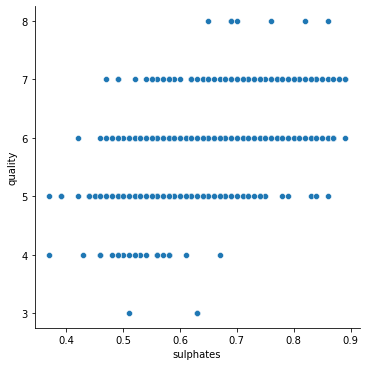

In [1561]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'sulphates', y='quality')

In [1562]:
df['sulphates'].describe()

count    573.000000
mean       0.626335
std        0.108887
min        0.370000
25%        0.550000
50%        0.610000
75%        0.690000
max        0.890000
Name: sulphates, dtype: float64

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

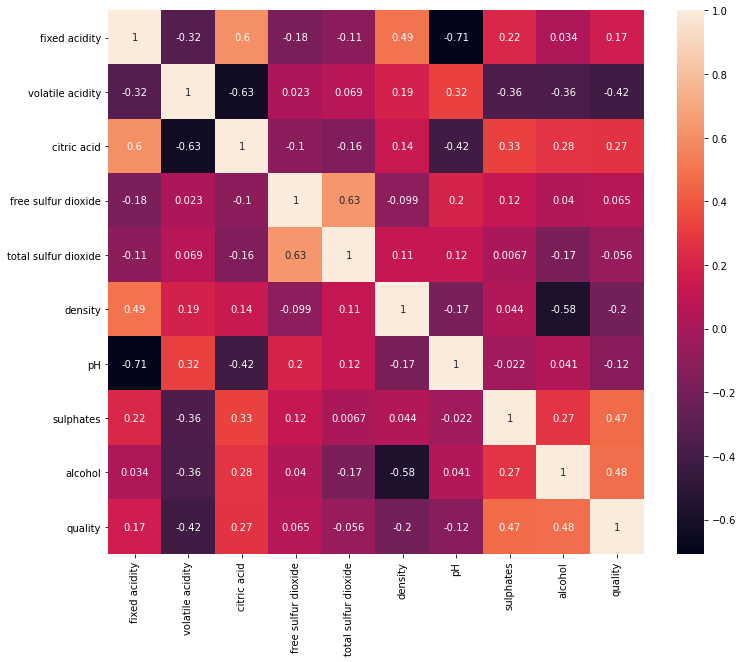

In [1563]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is 0.46 right now

In [1564]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['sulphates'].mean())
print('Median of the column:----->',df['sulphates'].median())
print('Mode of the column:----->',st.mode(df['sulphates']))
print('std of the column:----->',df['sulphates'].std())

Mean of the column:-----> 0.6263350785340318
Median of the column:-----> 0.61
Mode of the column:-----> 0.56
std of the column:-----> 0.10888744160220627


In [1565]:
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (573, 10)


# Column11: alcohol

In [1566]:
#check the null values, zero values in this column
df['alcohol'].unique()

array([ 9.4 , 10.  ,  9.5 ,  9.  ,  9.7 ,  9.3 ,  9.8 , 10.6 ,  9.6 ,
       10.8 ,  9.2 , 10.9 , 10.7 , 10.1 , 10.4 , 10.2 , 10.5 , 10.3 ,
       11.5 , 12.4 ,  9.1 , 11.  ,  9.9 , 12.8 , 12.6 , 11.7 , 12.5 ,
       11.3 , 12.3 ,  8.7 , 11.4 , 11.6 , 11.2 , 14.  ,  8.4 , 12.2 ,
       12.7 , 11.9 , 11.1 , 12.1 , 11.8 , 12.  , 13.2 , 12.9 , 13.6 ,
       13.  ,  9.55, 11.95,  9.95,  9.05, 10.55])

In [1567]:
df['alcohol'].describe()

count    573.000000
mean      10.546946
std        1.040896
min        8.400000
25%        9.600000
50%       10.400000
75%       11.300000
max       14.000000
Name: alcohol, dtype: float64

In [1568]:
#check the zero value
df['alcohol'].all()

True

In [1569]:
#count the value of each datapoint
df['alcohol'].value_counts()

9.50     40
9.40     32
10.00    28
9.60     27
10.50    25
9.80     23
9.70     21
10.40    19
11.00    19
11.20    17
11.30    17
9.20     17
9.30     17
10.80    17
10.30    15
10.10    14
11.50    14
10.90    14
10.20    14
11.10    13
10.70    12
11.80    12
11.70    12
11.40    11
11.90    10
12.50    10
10.60    10
12.00    10
9.00      8
12.40     8
9.90      8
12.10     7
12.80     7
12.20     6
9.10      6
11.60     6
12.30     5
12.60     5
12.90     3
9.55      2
12.70     2
8.40      1
13.20     1
9.95      1
13.60     1
10.55     1
14.00     1
9.05      1
8.70      1
13.00     1
11.95     1
Name: alcohol, dtype: int64

corr:-----> (10, 10)




<function matplotlib.pyplot.show(close=None, block=None)>

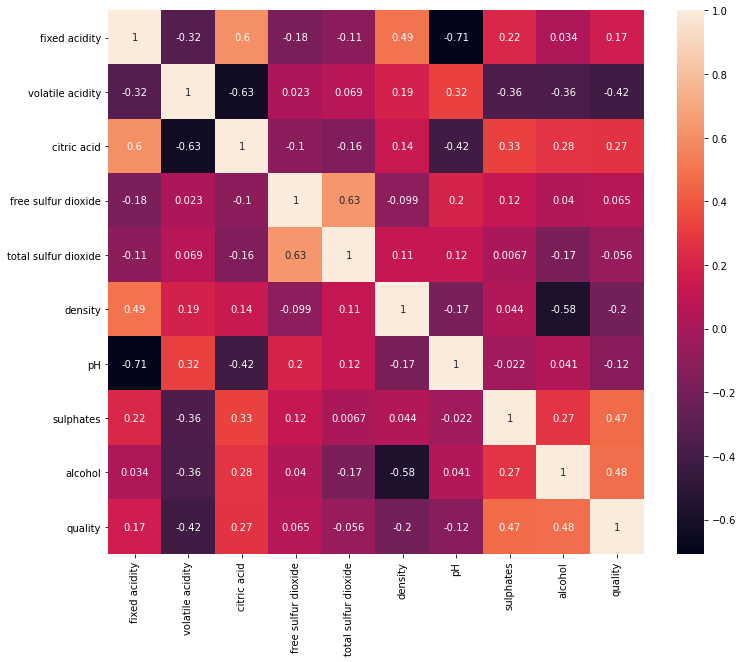

In [1570]:
# analyize the correlation
corr = df.corr()
print('corr:----->',corr.shape)
print('\n')
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.21 right now

In [1571]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['alcohol'].mean())
print('Median of the column:----->',df['alcohol'].median())
print('Mode of the column:----->',st.mode(df['alcohol']))
print('std of the column:----->',df['alcohol'].std())

Mean of the column:-----> 10.546945898778368
Median of the column:-----> 10.4
Mode of the column:-----> 9.5
std of the column:-----> 1.0408963956650523


Text(0.5, 0, 'alcohol')

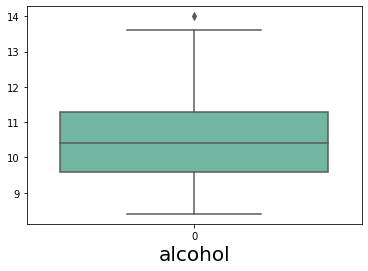

In [1572]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["alcohol"], palette="Set2", dodge=False)

plt.xlabel('alcohol', fontsize=20)

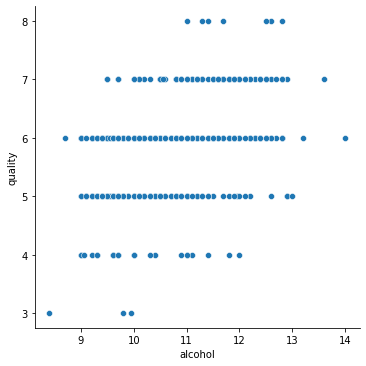

In [1573]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'alcohol', y='quality')

Text(0.5, 0, 'alcohol')

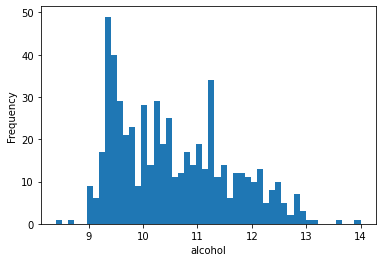

In [1574]:
# visualize by histogram
df['alcohol'].plot(kind ='hist', bins=50)
plt.xlabel('alcohol')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

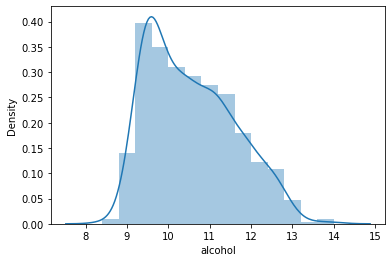

In [1575]:
sns.distplot(df['alcohol'])

In [1576]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['alcohol'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['alcohol'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1577]:
# higher side 
higher_side = df['alcohol'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['alcohol'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
5       False
7       False
8       False
18      False
        ...  
1582    False
1584    False
1585    False
1587    False
1598    False
Name: alcohol, Length: 573, dtype: bool
(array([138], dtype=int64),)
Lower: 0       False
5       False
7       False
8       False
18      False
        ...  
1582    False
1584    False
1585    False
1587    False
1598    False
Name: alcohol, Length: 573, dtype: bool
(array([], dtype=int64),)
old Shape:  (573, 10)


In [1578]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (572, 10)


Text(0.5, 0, 'alcohol')

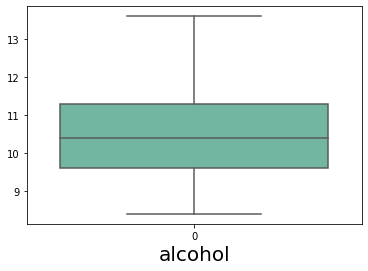

In [1579]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["alcohol"], palette="Set2", dodge=False)

plt.xlabel('alcohol', fontsize=20)

Text(0, 0.5, 'Density')

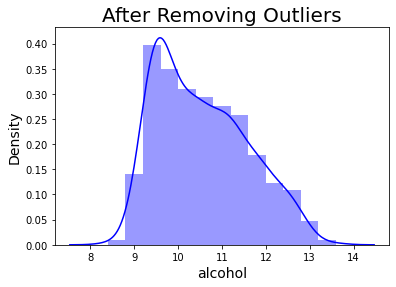

In [1580]:
# Visualize the boxplot after removing outliers
sns.distplot(df['alcohol'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('alcohol', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [1581]:
#count the value of each datapoint
df['alcohol'].value_counts()

9.50     40
9.40     32
10.00    28
9.60     27
10.50    25
9.80     23
9.70     21
11.00    19
10.40    19
11.30    17
9.20     17
9.30     17
10.80    17
11.20    17
10.30    15
10.20    14
10.90    14
11.50    14
10.10    14
11.10    13
10.70    12
11.80    12
11.70    12
11.40    11
11.90    10
10.60    10
12.00    10
12.50    10
9.90      8
9.00      8
12.40     8
12.80     7
12.10     7
11.60     6
9.10      6
12.20     6
12.30     5
12.60     5
12.90     3
12.70     2
9.55      2
13.60     1
13.20     1
10.55     1
9.95      1
8.40      1
9.05      1
13.00     1
8.70      1
11.95     1
Name: alcohol, dtype: int64

In [1582]:
#replace the small value with mean
df['alcohol']=df['alcohol'].replace(9.50, df['alcohol'].mean())

In [1583]:
#count the value of each datapoint
df['alcohol'].value_counts()

10.540909    40
9.400000     32
10.000000    28
9.600000     27
10.500000    25
9.800000     23
9.700000     21
11.000000    19
10.400000    19
11.200000    17
11.300000    17
9.200000     17
9.300000     17
10.800000    17
10.300000    15
10.200000    14
10.900000    14
11.500000    14
10.100000    14
11.100000    13
10.700000    12
11.800000    12
11.700000    12
11.400000    11
11.900000    10
10.600000    10
12.500000    10
12.000000    10
9.900000      8
9.000000      8
12.400000     8
12.800000     7
12.100000     7
11.600000     6
9.100000      6
12.200000     6
12.300000     5
12.600000     5
12.900000     3
12.700000     2
9.550000      2
13.200000     1
13.600000     1
10.550000     1
9.950000      1
9.050000      1
8.700000      1
13.000000     1
8.400000      1
11.950000     1
Name: alcohol, dtype: int64

Text(0, 0.5, 'Density')

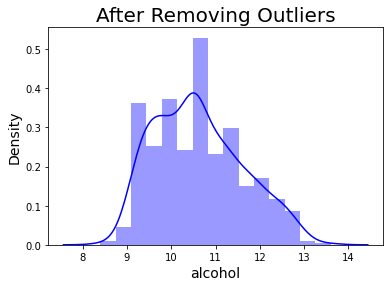

In [1584]:
# Visualize the boxplot after removing outliers
sns.distplot(df['alcohol'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('alcohol', fontsize=14)
plt.ylabel('Density', fontsize=14)

correlation between the Features and with label:-----> (10, 10)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

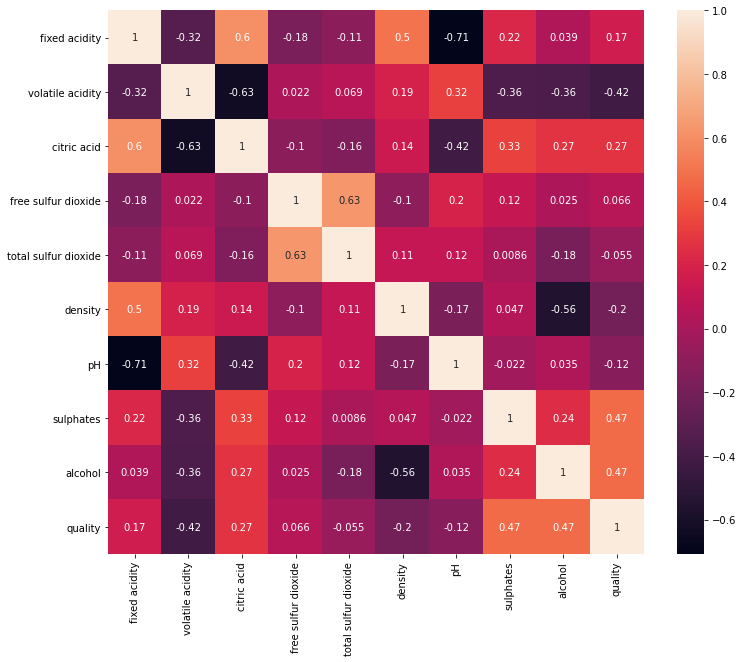

In [1585]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show #The relation between this column to response is -0.21 right now

In [1586]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['alcohol'].mean())
print('Median of the column:----->',df['alcohol'].median())
print('Mode of the column:----->',st.mode(df['alcohol']))
print('std of the column:----->',df['alcohol'].std())

Mean of the column:-----> 10.613699936427219
Median of the column:-----> 10.5409090909091
Mode of the column:-----> 10.5409090909091
std of the column:-----> 0.9915821811416863


In [1587]:
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (572, 10)


# Target Column: quality

In [1588]:
#check the null values, zero values in this column
df['quality'].unique()

array([5, 7, 4, 6, 8, 3], dtype=int64)

In [1589]:
df['quality'].describe()

count    572.000000
mean       5.737762
std        0.829264
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

In [1590]:
#check the zero value
df['quality'].all()

True

In [1591]:
#count the value of each datapoint
df['quality'].value_counts()

6    251
5    200
7     89
4     22
8      7
3      3
Name: quality, dtype: int64

In [1592]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['quality'].mean())
print('Median of the column:----->',df['quality'].median())
print('Mode of the column:----->',st.mode(df['quality']))
print('std of the column:----->',df['quality'].std())

Mean of the column:-----> 5.7377622377622375
Median of the column:-----> 6.0
Mode of the column:-----> 6
std of the column:-----> 0.8292637374033792


Text(0.5, 0, 'quality')

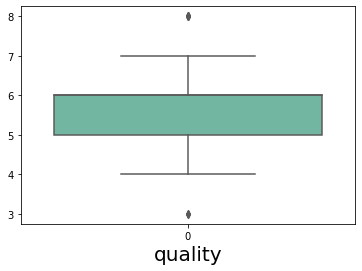

In [1593]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["quality"], palette="Set2", dodge=False)

plt.xlabel('quality', fontsize=20)

<AxesSubplot:xlabel='quality', ylabel='Count'>

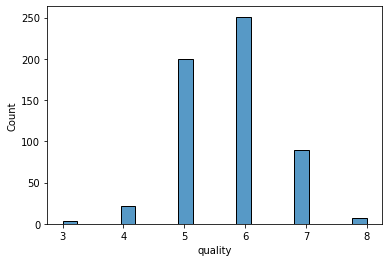

In [1594]:
# visualize by histogram
sns.histplot(df["quality"])

<AxesSubplot:xlabel='quality', ylabel='Density'>

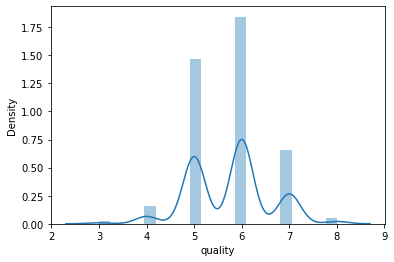

In [1595]:
sns.distplot(df["quality"])

In [1596]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['quality'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['quality'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1597]:
# higher side 
higher_side = df['quality'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['quality'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
5       False
7       False
8       False
18      False
        ...  
1582    False
1584    False
1585    False
1587    False
1598    False
Name: quality, Length: 572, dtype: bool
(array([ 85,  87, 144, 358, 414, 503, 554], dtype=int64),)
Lower: 0       False
5       False
7       False
8       False
18      False
        ...  
1582    False
1584    False
1585    False
1587    False
1598    False
Name: quality, Length: 572, dtype: bool
(array([147, 474, 527], dtype=int64),)
old Shape:  (572, 10)


In [1598]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (562, 10)


Text(0.5, 0, 'quality')

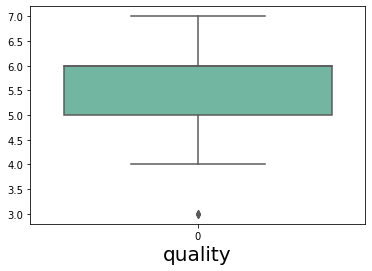

In [1599]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["quality"], palette="Set2", dodge=False)

plt.xlabel('quality', fontsize=20)

In [1600]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['quality'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['quality'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [1601]:
# higher side 
higher_side = df['quality'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['quality'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
5       False
7       False
8       False
18      False
        ...  
1582    False
1584    False
1585    False
1587    False
1598    False
Name: quality, Length: 562, dtype: bool
(array([], dtype=int64),)
Lower: 0       False
5       False
7       False
8       False
18      False
        ...  
1582    False
1584    False
1585    False
1587    False
1598    False
Name: quality, Length: 562, dtype: bool
(array([144, 468, 519], dtype=int64),)
old Shape:  (562, 10)


In [1602]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (559, 10)


Text(0.5, 0, 'quality')

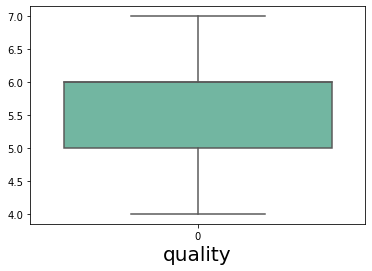

In [1603]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["quality"], palette="Set2", dodge=False)

plt.xlabel('quality', fontsize=20)

Text(0, 0.5, 'Density')

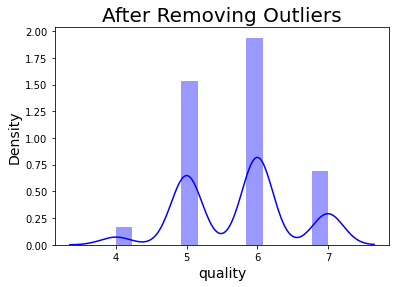

In [1604]:
# Visualize the boxplot after removing outliers
sns.distplot(df['quality'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('quality', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [1605]:
df['quality'].value_counts()

6    250
5    198
7     89
4     22
Name: quality, dtype: int64

In [1606]:
# Calculate mean, median, mode and std to check the normalization curve
print('Mean of the column:----->',df['quality'].mean())
print('Median of the column:----->',df['quality'].median())
print('Mode of the column:----->',st.mode(df['quality']))
print('std of the column:----->',df['quality'].std())

Mean of the column:-----> 5.726296958855098
Median of the column:-----> 6.0
Mode of the column:-----> 6
std of the column:-----> 0.7726547758843044


In [1607]:
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (559, 10)


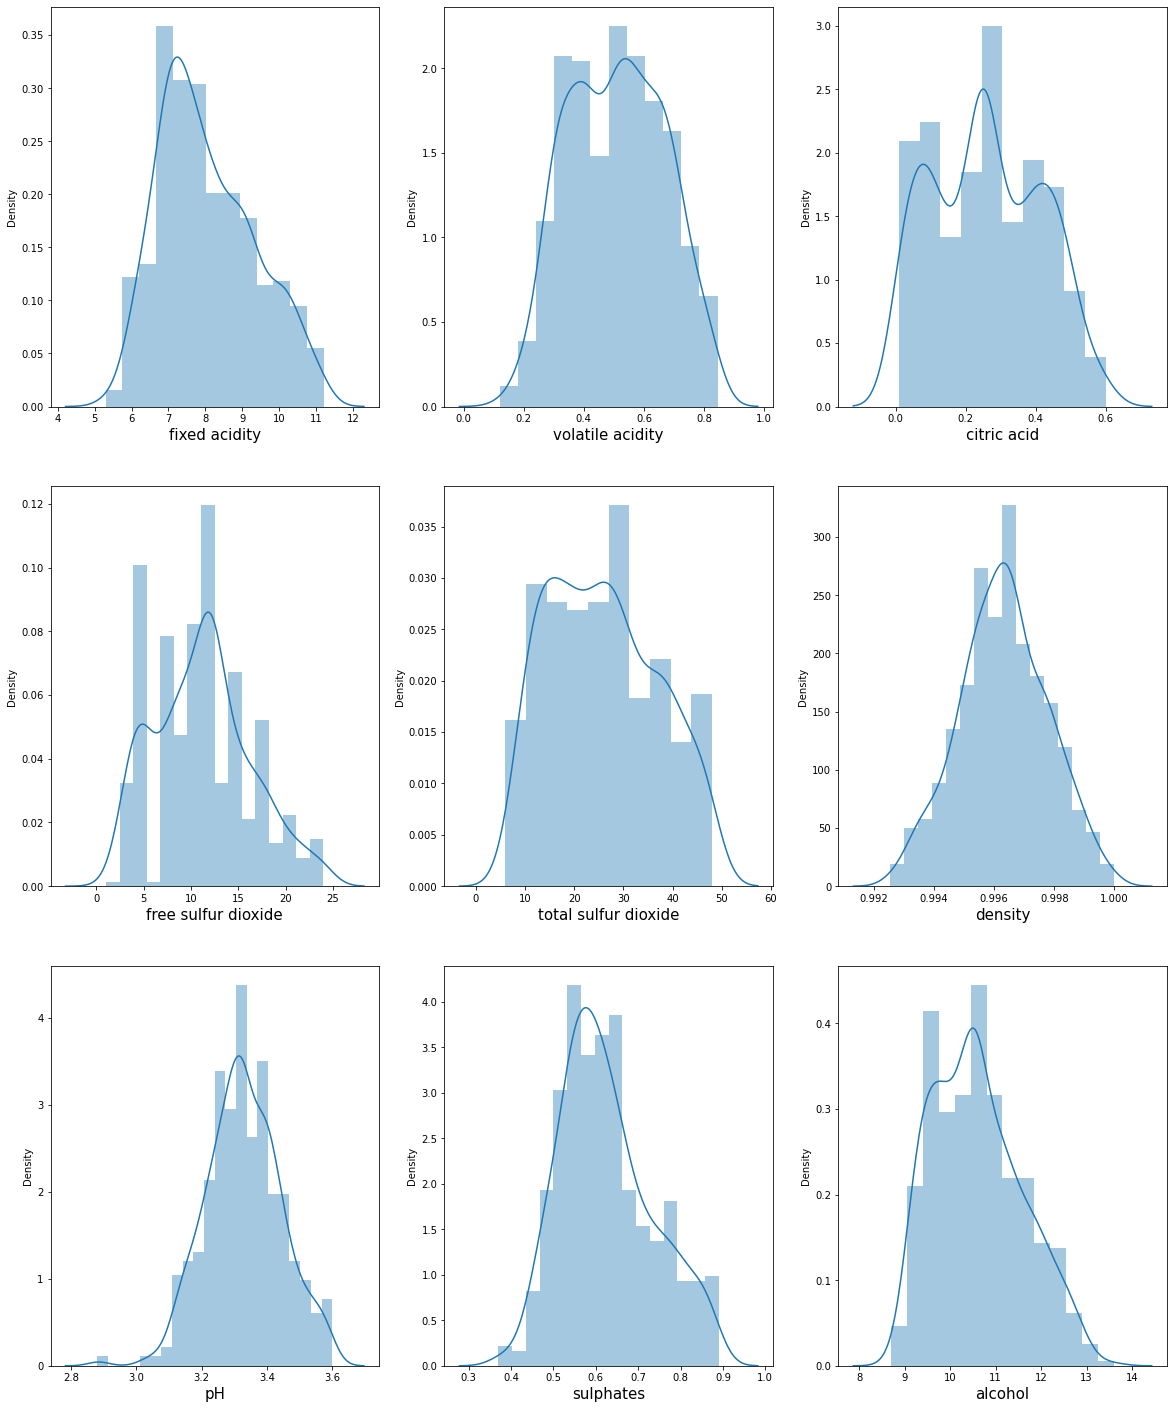

In [1609]:
#visaulize the columns by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show() 

correlation between the Features and with label:-----> (9, 9)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

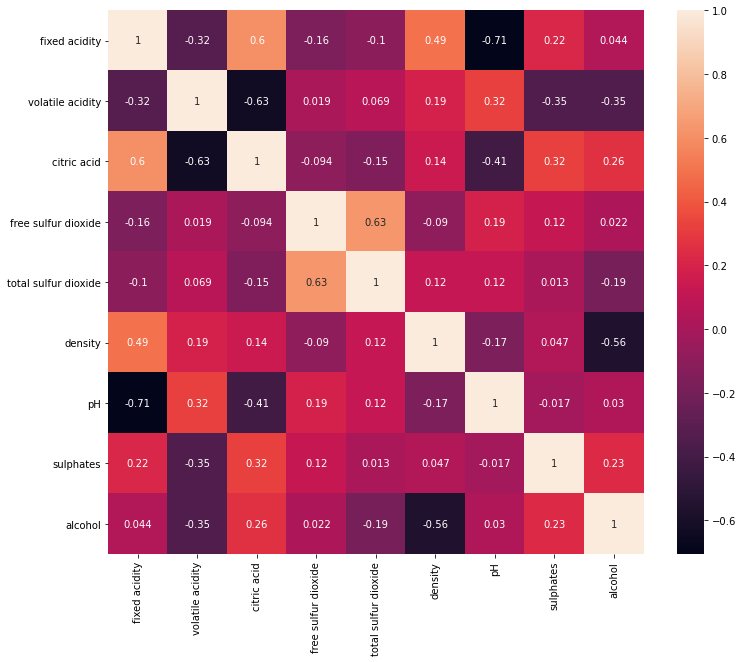

In [1678]:
# analyize the correlation
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap before removing outlers
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [1611]:
#splitting the quality into two parts good or bad, above 6.5 is considered as good otherwise bad
reviews = [] 
for i in df['quality']:
    if i >= 1 and i <= 6.5:
        reviews.append('0')
    elif i > 6.5:
        reviews.append('1')
    
df['Reviews'] = reviews #store the values in new column 'review'

In [1612]:
df['Reviews'] # add it in our dataset

0       0
5       0
7       1
8       1
18      0
       ..
1582    0
1584    1
1585    0
1587    0
1598    0
Name: Reviews, Length: 559, dtype: object

In [1613]:
df['Reviews'].value_counts()

0    470
1     89
Name: Reviews, dtype: int64

In [1614]:
df.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.256093,11.00000,34.0,0.9978,3.510000,0.56,9.400000,5,0
5,7.4,0.66,0.256093,13.00000,40.0,0.9978,3.510000,0.56,9.400000,5,0
7,7.3,0.65,0.256093,15.00000,21.0,0.9946,3.390000,0.47,10.000000,7,1
8,7.8,0.58,0.020000,9.00000,18.0,0.9968,3.324201,0.57,10.540909,7,1
18,7.4,0.59,0.080000,12.04951,29.0,0.9974,3.380000,0.50,9.000000,4,0


In [1615]:
df.drop(columns=['quality'], inplace=True) #delete column quality because of no use

In [1616]:
df.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Reviews
0,7.4,0.70,0.256093,11.00000,34.0,0.9978,3.510000,0.56,9.400000,0
5,7.4,0.66,0.256093,13.00000,40.0,0.9978,3.510000,0.56,9.400000,0
7,7.3,0.65,0.256093,15.00000,21.0,0.9946,3.390000,0.47,10.000000,1
8,7.8,0.58,0.020000,9.00000,18.0,0.9968,3.324201,0.57,10.540909,1
18,7.4,0.59,0.080000,12.04951,29.0,0.9974,3.380000,0.50,9.000000,0


In [1617]:
#split x and y
x = df.drop(['Reviews'], axis=1)
y=df.Reviews

In [1618]:
#scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.50351639,  1.20598995, -0.02784483, ...,  1.57774132,
        -0.59757703, -1.22917918],
       [-0.50351639,  0.9527649 , -0.02784483, ...,  1.57774132,
        -0.59757703, -1.22917918],
       [-0.58144154,  0.88945864, -0.02784483, ...,  0.53107919,
        -1.42510525, -0.61622192],
       ...,
       [-0.6593667 , -0.75650417,  1.16288017, ..., -0.2539174 ,
         1.97695522,  0.91617124],
       [-1.75031887,  0.63623359, -0.97373715, ...,  1.9266287 ,
         0.32189877,  0.30321398],
       [-1.59446856, -1.26295426,  1.35711811, ...,  0.53107919,
         0.32189877,  0.40537352]])

In [1619]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,4.865582,fixed acidity
1,2.094094,volatile acidity
2,2.484341,citric acid
3,1.818305,free sulfur dioxide
4,1.839049,total sulfur dioxide
5,3.347036,density
6,2.713885,pH
7,1.293496,sulphates
8,2.276856,alcohol


In [1620]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [1621]:
y_train.head()

1007    1
1093    1
1031    1
1417    1
1210    0
Name: Reviews, dtype: object

#  Logistic Regression

In [1622]:
#Model instantiating and training
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [1623]:
#Train the model
log_reg.score(x_train, y_train)

0.8591885441527446

In [1624]:
#Let's check how well model fits the test data
log_reg.score(x_test,y_test)

0.8285714285714286

In [1625]:
#make predictions
pred_test= log_reg.predict(x_test)

In [1626]:
#Cross validation score for logistic regression
lr_cv = log_reg.predict(x_test)

lr_acc= accuracy_score(y_test,lr_cv)


for i in range (2,10):
    lr_score= cross_val_score(log_reg,x,y,cv=i)
    lr_sc=lr_score.mean()
    print( 'At CV ------',i)
    print("CV Score is -----",lr_sc*100)
    print("Accuracy Score is -----",lr_acc*100)
    print("\n")

At CV ------ 2
CV Score is ----- 81.92716333845367
Accuracy Score is ----- 82.85714285714286


At CV ------ 3
CV Score is ----- 85.51166312077129
Accuracy Score is ----- 82.85714285714286


At CV ------ 4
CV Score is ----- 82.65159301130525
Accuracy Score is ----- 82.85714285714286


At CV ------ 5
CV Score is ----- 83.72425997425998
Accuracy Score is ----- 82.85714285714286


At CV ------ 6
CV Score is ----- 85.87089148173568
Accuracy Score is ----- 82.85714285714286


At CV ------ 7
CV Score is ----- 84.97513562386982
Accuracy Score is ----- 82.85714285714286


At CV ------ 8
CV Score is ----- 85.33126293995859
Accuracy Score is ----- 82.85714285714286


At CV ------ 9
CV Score is ----- 86.04995164134948
Accuracy Score is ----- 82.85714285714286




In [ ]:
#at each and every cv value, the accuracy score is same.

# KNeighborsClassifier

In [1627]:
Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train) #train the model

KNeighborsClassifier()

In [1628]:
Classifier.score(x_train,y_train) #check how much our model learn

0.9045346062052506

In [1629]:
Classifier.score(x_test,y_test) #check the score

0.8785714285714286

In [1630]:
from sklearn.metrics import confusion_matrix, classification_report

In [1631]:
knn = KNeighborsClassifier()

In [1632]:
knn.fit(x_train,y_train) #now train the data

KNeighborsClassifier()

In [1633]:
y_pred = knn.predict(x_test) #predict it

In [1634]:
cf = confusion_matrix(y_test, y_pred) #now check the confusion metrix
cf

array([[117,   1],
       [ 16,   6]], dtype=int64)

In [1635]:
print(classification_report(y_test,y_pred,digits=2)) #check the classification report

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       118
           1       0.86      0.27      0.41        22

    accuracy                           0.88       140
   macro avg       0.87      0.63      0.67       140
weighted avg       0.88      0.88      0.85       140



In [1636]:
#cross validation score to check if the model is overfitting
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_scaled,y,cv=5)

array([0.85714286, 0.85714286, 0.83928571, 0.75      , 0.84684685])

In [1637]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean() 

0.830083655083655

# GridsearchCV by using knn

In [1638]:
from sklearn.model_selection import GridSearchCV #import libraries

In [1639]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[12,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,12,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid)
gridsearch.fit(x_train,y_train) #train the model

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [12, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 12, 13]})

In [1640]:
gridsearch.best_params_ #get best parameters

{'algorithm': 'brute', 'leaf_size': 12, 'n_neighbors': 3}

In [1641]:
#put best params into knn
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size = 12, n_neighbors = 9) 

In [1642]:
knn.fit(x_train,y_train) #train the model

KNeighborsClassifier(algorithm='brute', leaf_size=12, n_neighbors=9)

In [1643]:
knn.score(x_train,y_train) #check the training score

0.8758949880668258

In [1644]:
knn.score(x_test,y_test) #check the score

0.8642857142857143

In [1645]:
y_pred = knn.predict(x_test) #predict it

In [1646]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8642857142857143

******************************************
Confusion_matrix:
 [[117   1]
 [ 18   4]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       118
           1       0.80      0.18      0.30        22

    accuracy                           0.86       140
   macro avg       0.83      0.59      0.61       140
weighted avg       0.86      0.86      0.83       140



# SVM

In [1647]:
from sklearn.svm import SVC #import libraries

In [1648]:
svc = SVC()

In [1649]:
svc.fit(x_train,y_train) #train the model

SVC()

In [1650]:
svc.score(x_train,y_train) #score of training data

0.8806682577565632

In [1651]:
svc.score(x_test,y_test) #check the score

0.85

In [1652]:
y_pred = svc.predict(x_test)

In [1653]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.85

******************************************
Confusion_matrix:
 [[116   2]
 [ 19   3]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       118
           1       0.60      0.14      0.22        22

    accuracy                           0.85       140
   macro avg       0.73      0.56      0.57       140
weighted avg       0.82      0.85      0.81       140



In [ ]:
#using gridsearchcv to improve the accuracy by using svm and x_scaled value

In [1654]:
param_grid = {'C': [0.001,1,2,4,5,6,7,9,10],
             'gamma': [0.7,0.2,0.3,0.4,0.5,0.6,0.8],
             'kernel': ['rbf']}

In [1655]:
gridsearch = GridSearchCV(SVC(), param_grid)

In [1656]:
gridsearch.fit(x_train,y_train) #train the model

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 1, 2, 4, 5, 6, 7, 9, 10],
                         'gamma': [0.7, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8],
                         'kernel': ['rbf']})

In [1657]:
gridsearch.best_params_ #get the best parameter

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [1658]:
svc = SVC(C=1, gamma=0.2) #put the params in svm

In [1659]:
svc.fit(x_train,y_train) #train the model

SVC(C=1, gamma=0.2)

In [1660]:
svc.score(x_train,y_train) #get the score of training data

0.9045346062052506

In [1661]:
svc.score(x_test,y_test) #check the score

0.8571428571428571

In [1662]:
y_pred = svc.predict(x_test)

In [1663]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8571428571428571

******************************************
Confusion_matrix:
 [[116   2]
 [ 18   4]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       118
           1       0.67      0.18      0.29        22

    accuracy                           0.86       140
   macro avg       0.77      0.58      0.60       140
weighted avg       0.83      0.86      0.82       140



# Plot ROC/AUC for multiple models

In [1664]:
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()

In [1665]:
#train the model
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [1666]:
log_reg.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
print("all models score are captured")

all models score are captured


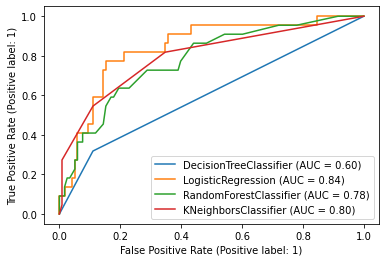

In [1667]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plt.show()

# RandomForestClassifier

In [1668]:
rf= RandomForestClassifier()

In [1669]:
rf.fit(x_train,y_train)#train the model

RandomForestClassifier()

In [1670]:
rf.score(x_train,y_train) # training data score

1.0

In [1671]:
rf.score(x_test,y_test) #testing data score

0.85

In [1672]:
y_pred=rf.predict(x_test)

In [1673]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.85

******************************************
Confusion_matrix:
 [[114   4]
 [ 17   5]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       118
           1       0.56      0.23      0.32        22

    accuracy                           0.85       140
   macro avg       0.71      0.60      0.62       140
weighted avg       0.82      0.85      0.82       140



In [ ]:
#using gridsearchcv by using random forest

In [1674]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

In [1675]:
grd = GridSearchCV(rf, param_grid=params)
grd.fit(x_train,y_train)
print('best_param - ', grd.best_params_) #get the best parameter

best_param -  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}


In [1676]:
#Check the accuarcy of our model
clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rf_cfm = confusion_matrix(y_test, y_pred)

In [1679]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , rf_cfm)
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8428571428571429

******************************************
Confusion_matrix:
 [[114   4]
 [ 18   4]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       118
           1       0.50      0.18      0.27        22

    accuracy                           0.84       140
   macro avg       0.68      0.57      0.59       140
weighted avg       0.81      0.84      0.81       140



In [ ]:
#Using PCA Technique with svm

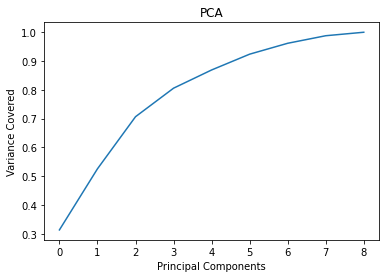

In [1680]:
pca =PCA()
pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [1681]:
pca = PCA(n_components=9)
p_newcomp = pca.fit_transform(x_scaled)
princi_comp = pd.DataFrame(p_newcomp, columns= ['fixed acidity','volatile acidity','citric acid','free sulphur dioxide','total sulphur dioxide','density','pH','sulphates','alchol'])
princi_comp

,fixed acidity,volatile acidity,citric acid,free sulphur dioxide,total sulphur dioxide,density,pH,sulphates,alchol
0,-1.772514,-1.406767,0.322535,0.788952,-0.643456,-1.019047,0.171966,0.494382,0.260421
1,-1.832908,-1.323365,0.970543,0.568343,-0.775355,-1.008422,0.295338,0.412789,0.260760
2,-1.525397,0.212684,-0.526136,-1.004417,-0.276035,-0.410064,-1.197815,0.539496,0.595449
3,-0.933337,-0.543213,-1.106535,-0.020224,0.516196,0.400254,0.092301,-0.937749,-0.166389
4,-1.773461,-1.641637,-0.079374,-0.260200,-0.707896,0.175536,-0.168845,-0.495813,0.113003
...,...,...,...,...,...,...,...,...,...
554,-3.037552,2.115671,-0.772021,-0.388613,0.486387,-1.077540,0.147661,0.265649,0.449128
555,0.584361,2.476838,2.599719,-0.025506,-0.131052,0.446459,-1.129049,0.393809,-0.874778
556,0.476775,2.069771,3.266425,0.085952,0.150861,0.490792,-0.088759,0.984366,-0.508214
557,-2.671056,1.671306,0.630463,0.730373,0.012222,-0.145592,-0.579751,-0.052439,0.065637


In [1682]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(princi_comp, y,test_size = 0.25, random_state=42)

In [1683]:
svc = SVC()
svc.fit(x_train,y_train) #train the model

SVC()

In [1684]:
svc.score(x_train,y_train) #training data score

0.8806682577565632

In [1685]:
svc.score(x_test,y_test) #testing data score

0.85

In [1686]:
y_pred = svc.predict(x_test)

In [1687]:
print('\n Accuracy Score---', accuracy_score(y_test, y_pred))


 Accuracy Score--- 0.85


In [1688]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[116,   2],
       [ 19,   3]], dtype=int64)

In [1689]:
#To check recall
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       118
           1       0.60      0.14      0.22        22

    accuracy                           0.85       140
   macro avg       0.73      0.56      0.57       140
weighted avg       0.82      0.85      0.81       140



In [ ]:
#Using Gridsearchcv with princi_comp (pca new dataframe)

In [1692]:
param_grid = {'C': [0.001,2,3,4,5,6,7,10],
             'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,1],
             'kernel': ['rbf']}

In [1693]:
gridsearch = GridSearchCV(SVC(), param_grid)

In [1694]:
gridsearch.fit(x_train,y_train) #train the model

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 2, 3, 4, 5, 6, 7, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
                         'kernel': ['rbf']})

In [1695]:
gridsearch.best_params_ #get the best parameter

{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}

In [1696]:
svc = SVC(C=2, gamma=0.1)

In [1697]:
svc.fit(x_train,y_train) #train the model

SVC(C=2, gamma=0.1)

In [1698]:
svc.score(x_train,y_train) #training score

0.8997613365155132

In [1699]:
svc.score(x_test,y_test) #testing score

0.8571428571428571

In [1700]:
y_pred = svc.predict(x_test) 

In [1701]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8571428571428571

******************************************
Confusion_matrix:
 [[116   2]
 [ 18   4]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       118
           1       0.67      0.18      0.29        22

    accuracy                           0.86       140
   macro avg       0.77      0.58      0.60       140
weighted avg       0.83      0.86      0.82       140



In [ ]:
#Creating pipeline and predict the score with svm

In [1708]:
pipe = Pipeline([('Scaler',StandardScaler()),
                ('PCA',PCA(n_components=9)),
                ('SVM',SVC(C=7, gamma = 0.1))])

In [1709]:
pipe.fit(x_train,y_train) #train the model

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=9)),
                ('SVM', SVC(C=7, gamma=0.1))])

In [1704]:
pipe.score(x_train,y_train) #training score

0.9522673031026253

In [1705]:
pipe.score(x_test,y_test) #testing score

0.8642857142857143

In [1710]:
y_pred = pipe.predict(x_test)

In [1711]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score:-------->  ',accuracy_score(y_test,y_pred))
print('\n******************************************')
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred))
print('\n******************************************')
print('Classification_report:\n' , classification_report(y_test,y_pred))

Accuracy_score:-------->   0.8642857142857143

******************************************
Confusion_matrix:
 [[114   4]
 [ 15   7]]

******************************************
Classification_report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       118
           1       0.64      0.32      0.42        22

    accuracy                           0.86       140
   macro avg       0.76      0.64      0.67       140
weighted avg       0.84      0.86      0.84       140



# saving the model to the local file system

In [1712]:
with open('Red_wine_quality_model','wb') as f:
    pickle.dump(knn,f)